In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mennaw39haleem","key":"bc6207804e8b3098285b0ef046706717"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sakhawat18/asteroid-dataset
!unzip asteroid-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset
License(s): ODbL-1.0
Archive:  asteroid-dataset.zip
  inflating: dataset.csv             


---

# 📊 About the Data

### 1. Overview:
This dataset contains detailed information about **small celestial bodies** (primarily asteroids).  
The main goal of collecting this data is to study the properties of asteroids, such as their size, orbital parameters, classification, and their potential threat to Earth.

---

### 2. Dataset Description:
The file consists of **131,237** entries (each representing a celestial object) and **53** columns.  
Each column describes a specific property or orbital characteristic of an asteroid.

---

### 3. Key Columns:

| Column | Description |
|:-------|:------------|
| `id` | Unique identifier for each asteroid. |
| `spkid` | A specific numeric ID assigned to each asteroid. |
| `full_name` | The full official name of the asteroid. |
| `pdes` | Permanent designation number. |
| `neo` | Indicates whether the asteroid is a Near-Earth Object (`Y` or `N`). |
| `pha` | Indicates if the asteroid is considered Potentially Hazardous (`Y` or `N`). |
| `H` | Absolute magnitude (brightness) of the asteroid. |
| `diameter` | Estimated diameter of the asteroid (in kilometers). |
| `albedo` | Reflectivity of the asteroid's surface. |
| `diameter_sigma` | Uncertainty in the diameter measurement. |
| `orbit_id` | Orbit identification number. |
| `epoch` | Epoch date in astronomical terms. |
| `epoch_mjd` | Epoch in Modified Julian Date. |
| `epoch_cal` | Epoch in calendar date format. |
| `e`, `a`, `q`, `i` | Orbital parameters like eccentricity, semi-major axis, perihelion distance, and inclination. |
| `om`, `w`, `ma` | Angular orbital elements (Longitude of Ascending Node, Argument of Perihelion, Mean Anomaly). |
| `ad` | Aphelion distance (farthest point from the Sun). |
| `n` | Mean motion (average orbital speed). |
| `tp` | Time of perihelion passage. |
| `tp_cal` | Perihelion passage time in calendar format. |
| `per`, `per_y` | Orbital period in days and years. |
| `moid`, `moid_ld` | Minimum orbit intersection distance with Earth (in AU and Lunar Distance units). |
| `rms` | Root mean square of orbital fit residuals. |
| `class_...` | Classification flags for asteroid groups (AMO, APO, AST, MBA, etc.) converted from boolean to integer values (1/0). |

---

### 4. Special Features:

- The `class_*` columns are used to classify asteroids based on their orbital characteristics.
- These classification columns were initially Boolean and were later converted to integers (`1` for True, `0` for False) for easier processing.

---

### 5. Data Preprocessing Steps:
- Outliers in numerical columns were handled by **clipping** the values at the lower and upper bounds rather than deleting rows.
- Missing values were carefully handled.
- Only **numeric columns** were selected for machine learning modeling.
- The categorical text columns (like `neo`, `pha`) were kept as-is for potential future conversion if needed.

---

### 6. Potential Applications:

- 🛡️ Identifying asteroids that pose a potential threat to Earth.
- 📏 Analyzing asteroid sizes and their distribution.
- 🔭 Building machine learning models to predict asteroid properties like diameter or brightness.
- 🛰️ Understanding the orbital behavior and inclination patterns of asteroids relative to Earth.

---

# 📚 Summary:

- **Data Type**: Astronomical Objects (Asteroids)
- **Number of Rows**: 131,237
- **Number of Columns**: 53
- **Main Goal**: Analyze asteroid diameters.

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures


# Read Data

In [5]:
df = pd.read_csv('/content/dataset.csv', low_memory=False)
df.head()

id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.608900e-09  6.168800e-08  6.624800e-08  7.820700e-09   
1   545.000  ...  3.469400e-06  6.272400e-06  9.128200e-06  8.859100e-06   
2   246.596  ...  3.223100e-06  1.664600e-05  1.772100e-05  8.110400e-06   
3   525.400  ...  2.170600e-07  3.880800e-07  1.789300e-07  1.206800e-06   
4   106.699  ...  2.740800e-06  2.894900e-05  2.984200e-05  8.303800e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.111300e-11  1.196500e-12  3.782900e-08  9.415900e-09    MBA  0.43301  
1  4.961300e-09  4.653600e-10  4.078700e-05  3.680700e-06    MBA  0.35936  
2  4.363900e-09  4.413400e-10  3.528800e-05  3.107200e-06    MBA  0.33848  
3  1.648600e-09  2.612500e-10  4.103700e-06  1.274900e-06    MBA  0.39980  
4  4.729000e-09  5.522700e-10  3.474300e-05  3.490500e-06    MBA  0.52191  

[5 rows x 45 columns]

In [6]:
df.shape

(958524, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [8]:
df.describe()

spkid              H       diameter         albedo  \
count  9.585240e+05  952261.000000  136209.000000  135103.000000   
mean   3.810114e+06      16.906411       5.506429       0.130627   
std    6.831541e+06       1.790405       9.425164       0.110323   
min    2.000001e+06      -1.100000       0.002500       0.001000   
25%    2.239632e+06      16.100000       2.780000       0.053000   
50%    2.479262e+06      16.900000       3.972000       0.079000   
75%    3.752518e+06      17.714000       5.765000       0.190000   
max    5.401723e+07      33.200000     939.400000       1.000000   

       diameter_sigma         epoch      epoch_mjd     epoch_cal  \
count   136081.000000  9.585240e+05  958524.000000  9.585240e+05   
mean         0.479184  2.458869e+06   58868.781950  2.019693e+07   
std          0.782895  7.016716e+02     701.671573  1.930354e+04   
min          0.000500  2.425052e+06   25051.000000  1.927062e+07   
25%          0.180000  2.459000e+06   59000.000000  2.020053e+07   
50%          0.332000  2.459000e+06   59000.000000  2.020053e+07   
75%          0.620000  2.459000e+06   59000.000000  2.020053e+07   
max        140.000000  2.459000e+06   59000.000000  2.020053e+07   

                   e              a  ...       sigma_q       sigma_i  \
count  958524.000000  958524.000000  ...  9.386020e+05  9.386020e+05   
mean        0.156116       2.902143  ...  1.982929e+01  1.168449e+00   
std         0.092643      39.719503  ...  2.903785e+03  1.282231e+02   
min         0.000000  -14702.447872  ...  1.956900e-11  4.608900e-09   
25%         0.092193       2.387835  ...  1.462000e-07  6.095900e-06   
50%         0.145002       2.646969  ...  2.271900e-07  8.688800e-06   
75%         0.200650       3.001932  ...  6.583200e-07  1.591500e-05   
max         1.855356   33488.895955  ...  1.015000e+06  5.533000e+04   

           sigma_om       sigma_w      sigma_ma      sigma_ad       sigma_n  \
count  9.386020e+05  9.386020e+05  9.386020e+05  9.385980e+05  9.386020e+05   
mean   5.310234e+00  1.370062e+06  1.369977e+06  2.131453e+01  5.060221e-02   
std    1.333381e+03  9.158996e+08  9.158991e+08  7.197034e+03  9.814953e+00   
min    6.168800e-08  6.624800e-08  7.820700e-09  1.111300e-11  1.196500e-12   
25%    3.619400e-05  5.755000e-05  2.573700e-05  2.340900e-08  2.768800e-09   
50%    6.642550e-05  1.047100e-04  4.900100e-05  4.359000e-08  4.638000e-09   
75%    1.609775e-04  3.114400e-04  1.718900e-04  1.196600e-07  1.124000e-08   
max    1.199100e+06  8.845100e+11  8.845100e+11  5.509700e+06  7.698800e+03   

           sigma_tp     sigma_per            rms  
count  9.386020e+05  9.385980e+05  958522.000000  
mean   4.312780e+08  8.525815e+04       0.561153  
std    2.953046e+11  2.767681e+07       2.745700  
min    3.782900e-08  9.415900e-09       0.000000  
25%    1.110900e-04  1.794500e-05       0.518040  
50%    2.230800e-04  3.501700e-05       0.566280  
75%    8.139600e-04  9.775475e-05       0.613927  
max    2.853100e+14  1.910700e+10    2686.600000  

[8 rows x 35 columns]

In [9]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

# Data Cleaning

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
def column_info(data):
    cols=[]
    dtype=[]
    unique_v=[]
    nunique=[]

    for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype.name)
        unique_v.append(data[col].unique())
        nunique.append(data[col].nunique())

    return pd.DataFrame({'Column':cols,"Data type":dtype,"Unique Values":unique_v,"num_unique values":nunique})

In [12]:
column_info(df)

Column Data type  \
0               id    object   
1            spkid     int64   
2        full_name    object   
3             pdes    object   
4             name    object   
5           prefix    object   
6              neo    object   
7              pha    object   
8                H   float64   
9         diameter   float64   
10          albedo   float64   
11  diameter_sigma   float64   
12        orbit_id    object   
13           epoch   float64   
14       epoch_mjd     int64   
15       epoch_cal   float64   
16         equinox    object   
17               e   float64   
18               a   float64   
19               q   float64   
20               i   float64   
21              om   float64   
22               w   float64   
23              ma   float64   
24              ad   float64   
25               n   float64   
26              tp   float64   
27          tp_cal   float64   
28             per   float64   
29           per_y   float64   
30            moid   float64   
31         moid_ld   float64   
32         sigma_e   float64   
33         sigma_a   float64   
34         sigma_q   float64   
35         sigma_i   float64   
36        sigma_om   float64   
37         sigma_w   float64   
38        sigma_ma   float64   
39        sigma_ad   float64   
40         sigma_n   float64   
41        sigma_tp   float64   
42       sigma_per   float64   
43           class    object   
44             rms   float64   

                                        Unique Values  num_unique values  
0   [a0000001, a0000002, a0000003, a0000004, a0000...             958524  
1   [2000001, 2000002, 2000003, 2000004, 2000005, ...             958524  
2   [     1 Ceres,      2 Pallas,      3 Juno,    ...             958524  
3   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             958524  
4   [Ceres, Pallas, Juno, Vesta, Astraea, Hebe, Ir...              22064  
5                                            [nan, A]                  1  
6                                         [N, Y, nan]                  2  
7                                         [N, Y, nan]                  2  
8   [3.4, 4.2, 5.33, 3.0, 6.9, 5.8, 5.6, 6.5, 6.3,...               9489  
9   [939.4, 545.0, 246.596, 525.4, 106.699, 185.18...              16591  
10  [0.09, 0.101, 0.214, 0.4228, 0.274, 0.2679, 0....               1057  
11  [0.2, 18.0, 10.594, 3.14, 2.9, 10.0, 1.025, na...               3054  
12  [JPL 47, JPL 37, JPL 112, JPL 35, JPL 114, JPL...               4690  
13  [2458600.5, 2459000.5, 2455926.5, 2453228.5, 2...               5246  
14  [58600, 59000, 55926, 53228, 55844, 55202, 524...               5246  
15  [20190427.0, 20200531.0, 20111231.0, 20040811....               5246  
16                                            [J2000]                  1  
17  [0.0760090265983052, 0.2299722588646258, 0.256...             958444  
18  [2.769165148633284, 2.773841434873298, 2.66828...             958509  
19  [2.558683601195717, 2.135934854363191, 1.98270...             958509  
20  [10.59406719506626, 34.83293159121413, 12.9910...             958414  
21  [80.30553090445737, 173.0247412488342, 169.851...             958518  
22  [73.59769469844186, 310.2023924446679, 248.066...             958519  
23  [77.37209751948711, 144.9756754788195, 125.435...             958519  
24  [2.979646696070851, 3.411748015383405, 3.35386...             958505  
25  [0.2138852265918273, 0.213344586343708, 0.2261...             958514  
26  [2458238.7541293176, 2458320.9623657744, 24584...             958519  
27  [20180430.2541293, 20180721.4623658, 20181123....             958499  
28  [1683.145702657688, 1687.410991624711, 1592.01...             958510  
29  [4.60820178687936, 4.61987951163507, 4.3586961...             958511  
30  [1.59478, 1.23429, 1.03429, 1.13948, 1.09575, ...             314300  
31  [620.6405326, 480.3486393, 402.5146393, 443.45...             314301  
32  [4.819e-12, 3.1934e-08, 3.052e-08, 2.3321e-10,...           

In [13]:
df.isnull().sum().sort_values(ascending=False)

prefix            958506
name              936460
albedo            823421
diameter_sigma    822443
diameter          822315
sigma_per          19926
sigma_ad           19926
sigma_om           19922
sigma_ma           19922
sigma_q            19922
sigma_a            19922
sigma_w            19922
sigma_i            19922
sigma_tp           19922
sigma_e            19922
sigma_n            19922
moid               19921
pha                19921
H                   6263
moid_ld              127
neo                    4
ad                     4
per                    4
rms                    2
per_y                  1
ma                     1
id                     0
full_name              0
pdes                   0
orbit_id               0
spkid                  0
tp_cal                 0
om                     0
w                      0
tp                     0
n                      0
i                      0
equinox                0
epoch_cal              0
epoch_mjd              0
e                      0
epoch                  0
a                      0
q                      0
class                  0
dtype: int64

In [14]:
df = df.dropna(subset='diameter')

In [15]:
df.isnull().sum().sort_values(ascending=False)

prefix            136209
name              121047
H                   4164
albedo              1109
diameter_sigma       128
pdes                   0
full_name              0
spkid                  0
id                     0
pha                    0
neo                    0
diameter               0
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     0
ad                     0
n                      0
tp                     0
tp_cal                 0
per                    0
per_y                  0
moid                   0
moid_ld                0
sigma_e                0
sigma_a                0
sigma_q                0
sigma_i                0
sigma_om               0
sigma_w                0
sigma_ma               0
sigma_ad               0
sigma_n                0
sigma_tp               0
sigma_per              0
class                  0
rms                    0
dtype: int64

In [16]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [17]:
df.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix','diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal','tp', 'tp_cal', 'per', 'per_y'],axis=1,inplace=True)

<ipython-input-17-fd46ceb2bc76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix','diameter_sigma', 'orbit_id', 'epoch',


In [18]:
df.isnull().sum().sort_values(ascending=False).head(10)

H           4164
albedo      1109
pha            0
neo            0
diameter       0
equinox        0
e              0
a              0
q              0
i              0
dtype: int64

In [19]:
df = df.dropna(subset=['albedo'])

In [20]:
df.isnull().sum().sort_values(ascending=False).head(10)

H           3863
neo            0
pha            0
diameter       0
albedo         0
equinox        0
e              0
a              0
q              0
i              0
dtype: int64

In [21]:
df = df.dropna(subset=['H'])

In [22]:
df.isnull().sum().sort_values(ascending=False).head(10)

neo         0
pha         0
H           0
diameter    0
albedo      0
equinox     0
e           0
a           0
q           0
i           0
dtype: int64

In [23]:
df.columns

Index(['neo', 'pha', 'H', 'diameter', 'albedo', 'equinox', 'e', 'a', 'q', 'i',
       'om', 'w', 'ma', 'ad', 'n', 'moid', 'moid_ld', 'sigma_e', 'sigma_a',
       'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad',
       'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms'],
      dtype='object')

# visualization

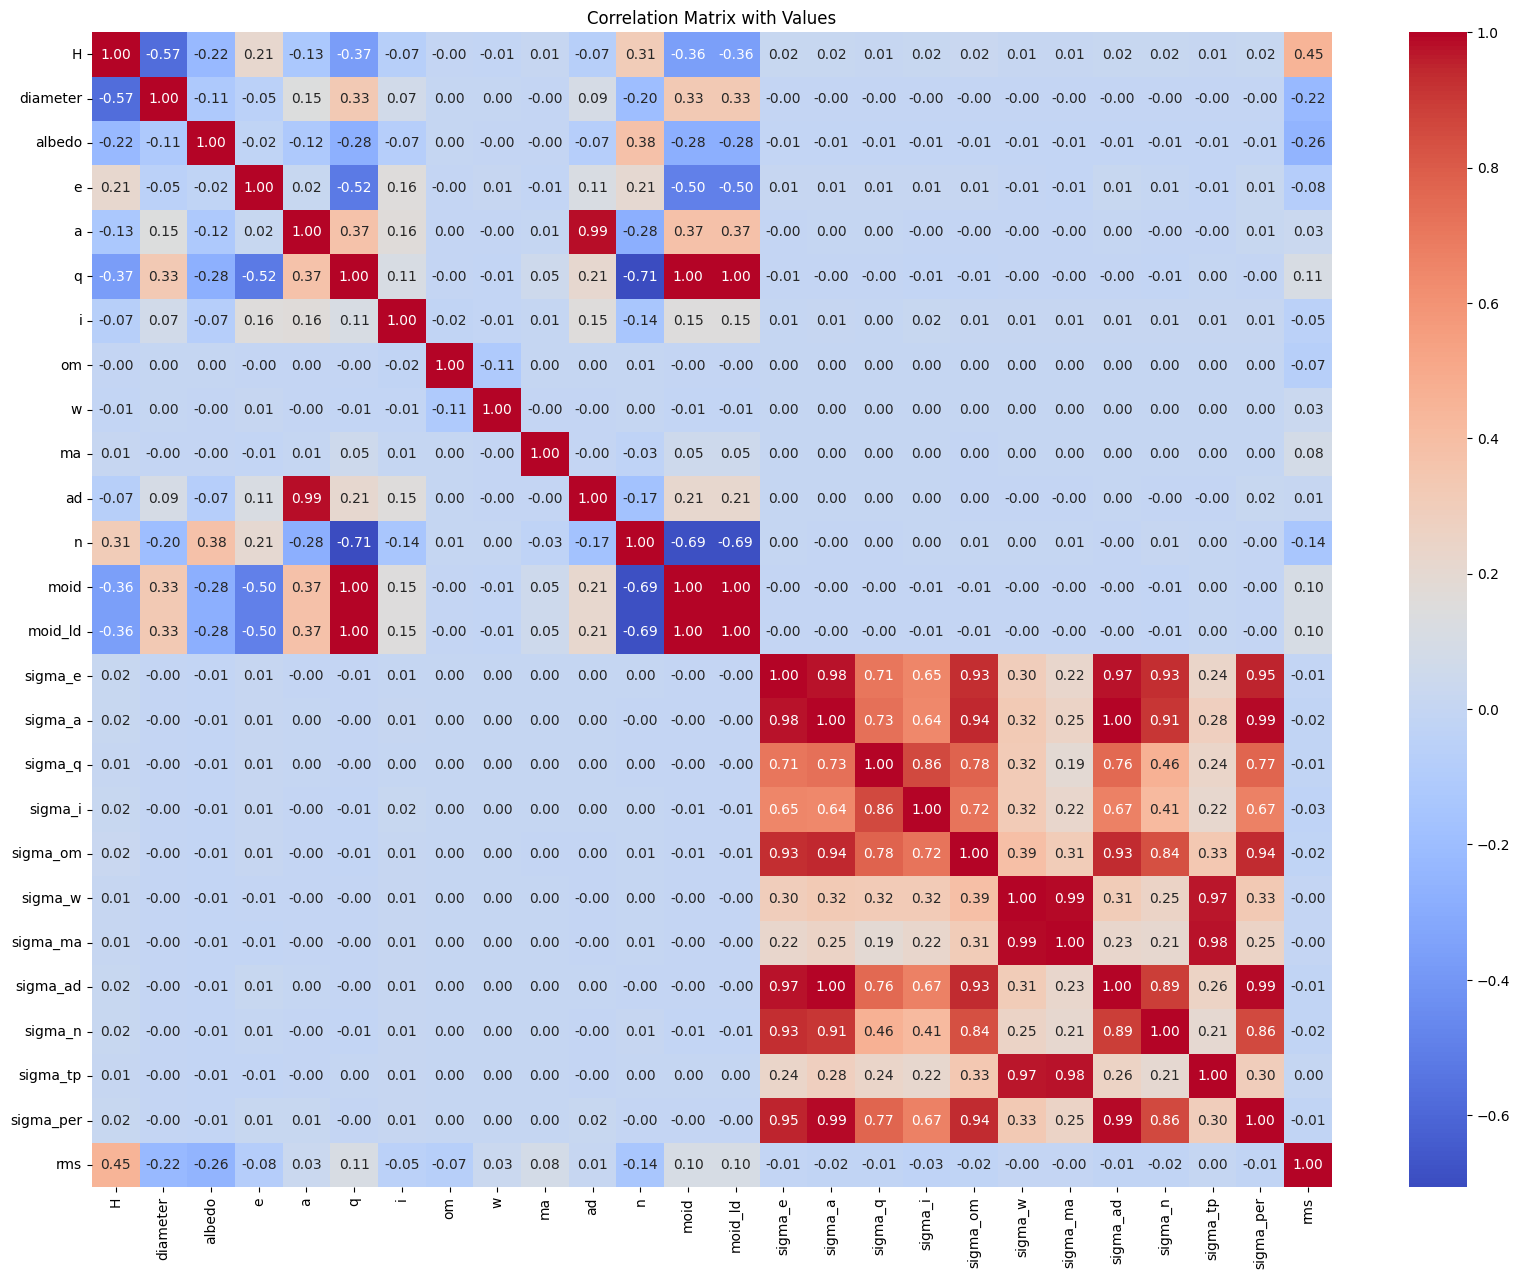

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr(numeric_only=True)


plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Values')
plt.show()


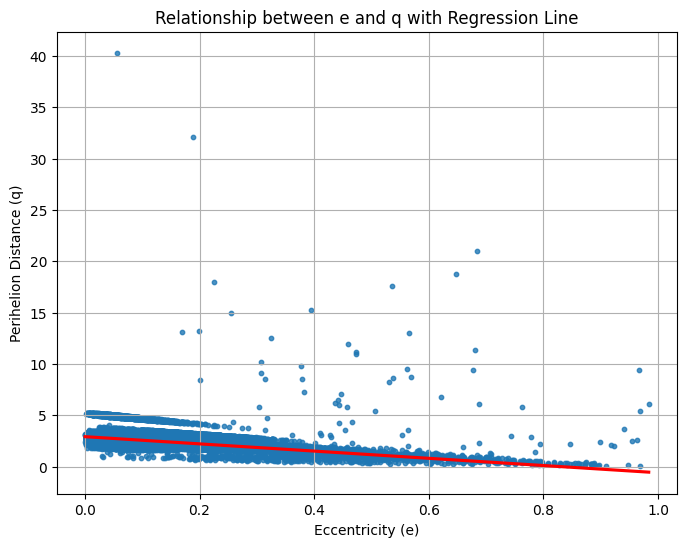

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='e', y='q', scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Relationship between e and q with Regression Line')
plt.xlabel('Eccentricity (e)')
plt.ylabel('Perihelion Distance (q)')
plt.grid(True)
plt.show()


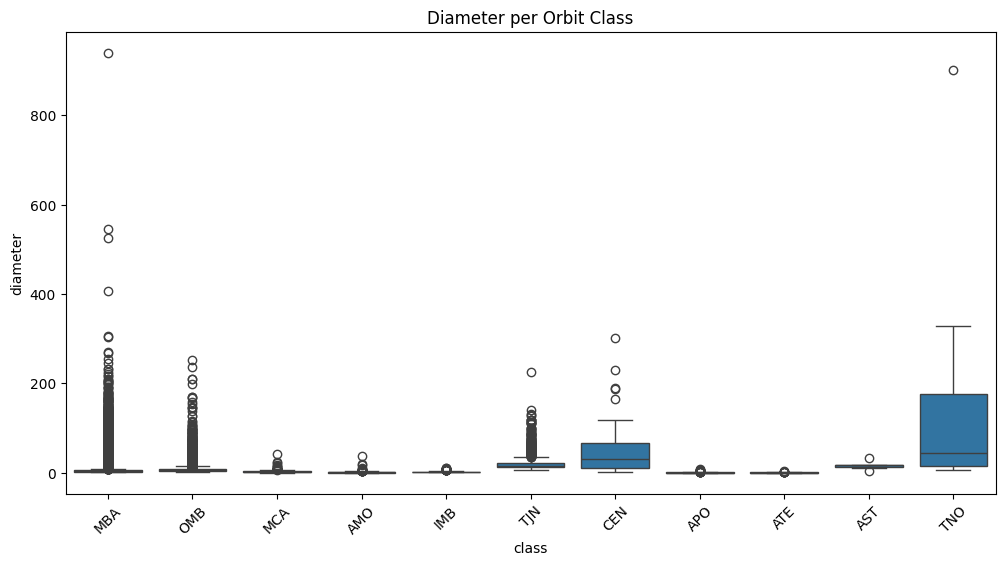

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='class', y='diameter')
plt.xticks(rotation=45)
plt.title('Diameter per Orbit Class')
plt.show()

In [27]:
df['class'].value_counts()


class
MBA    120420
OMB      7302
TJN      1873
APO       454
IMB       451
MCA       325
AMO       253
ATE        91
CEN        50
TNO        12
AST         6
Name: count, dtype: int64

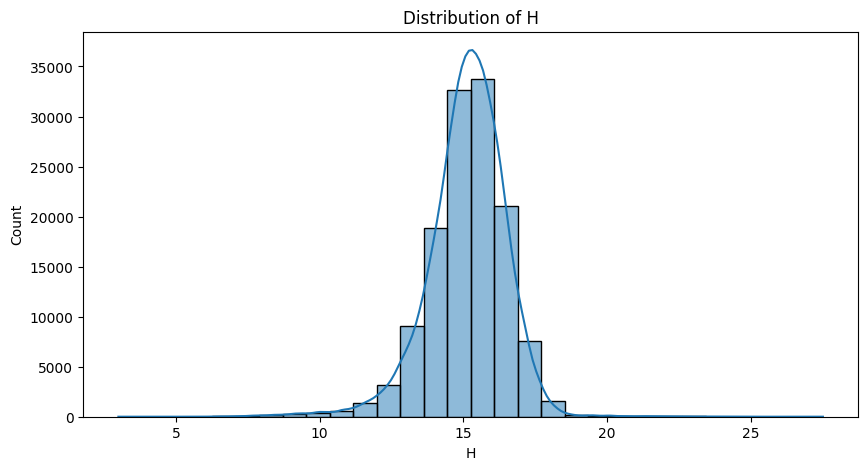

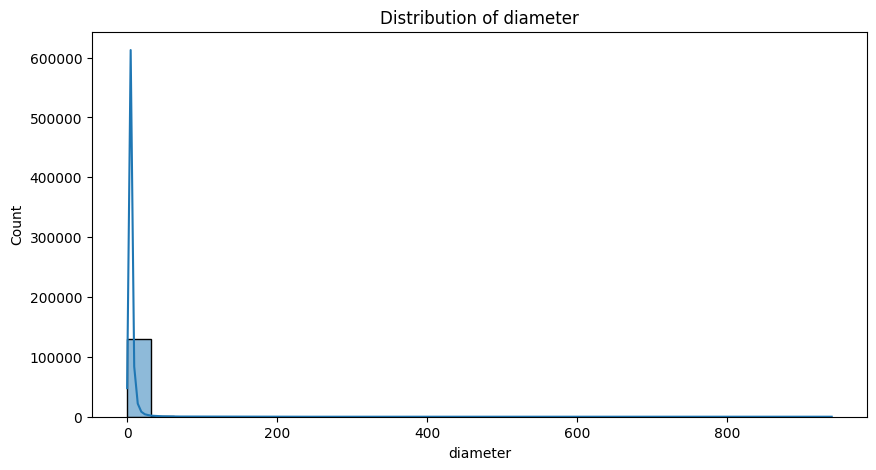

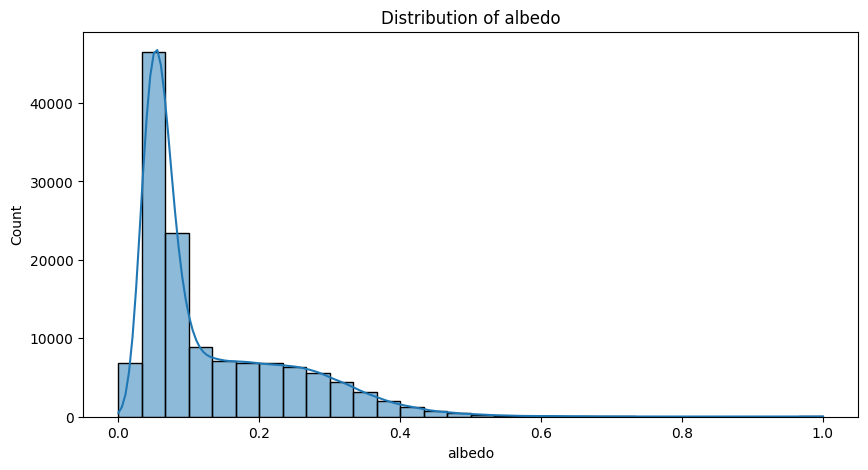

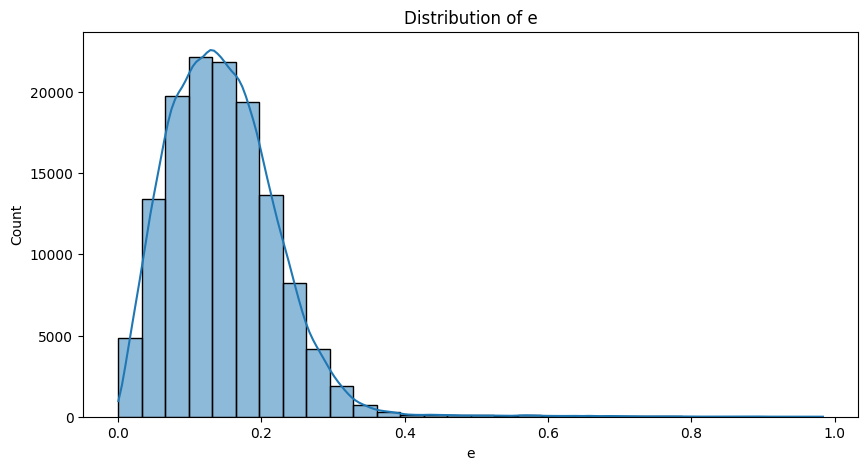

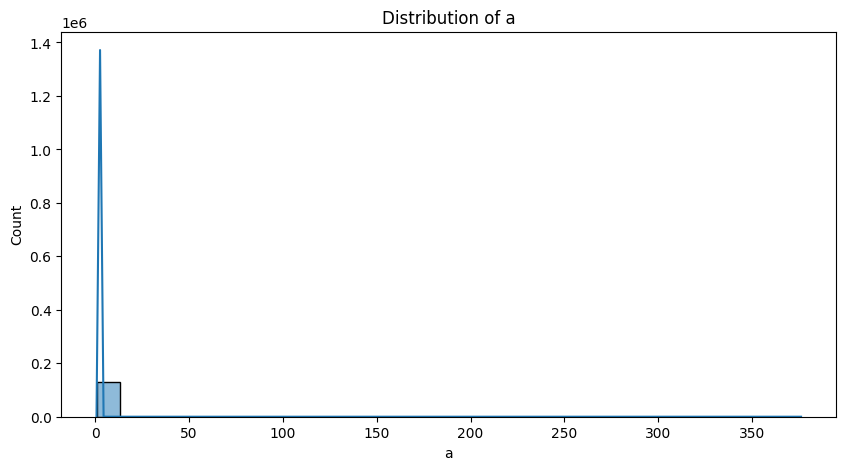

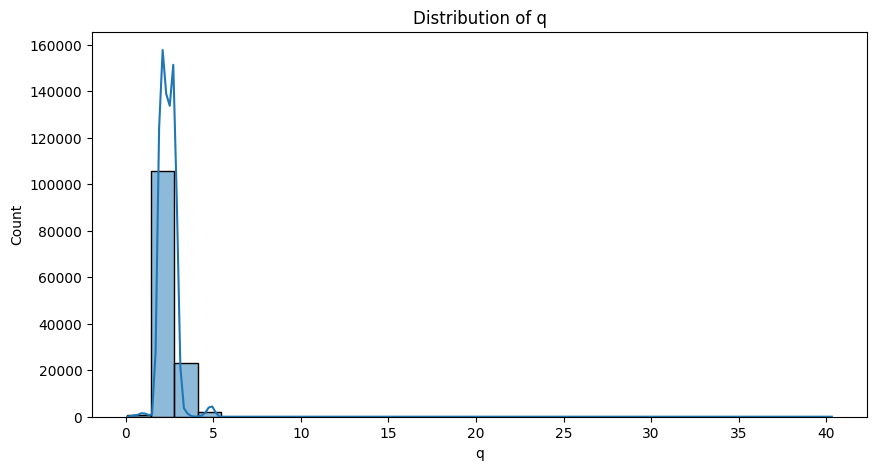

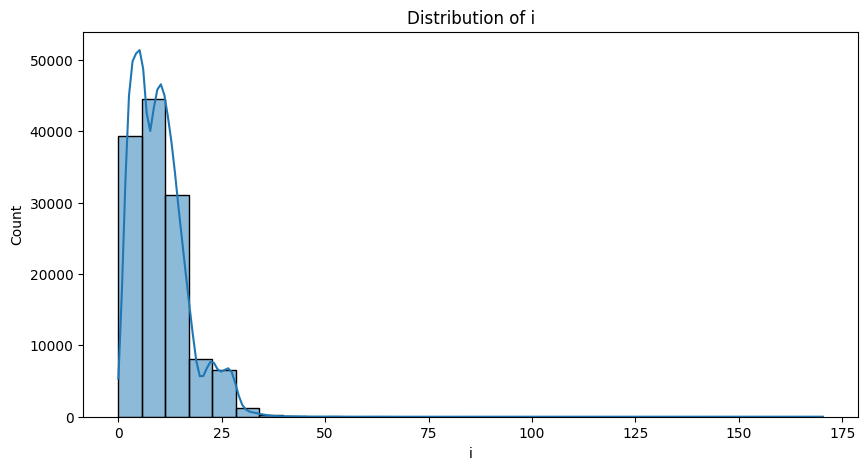

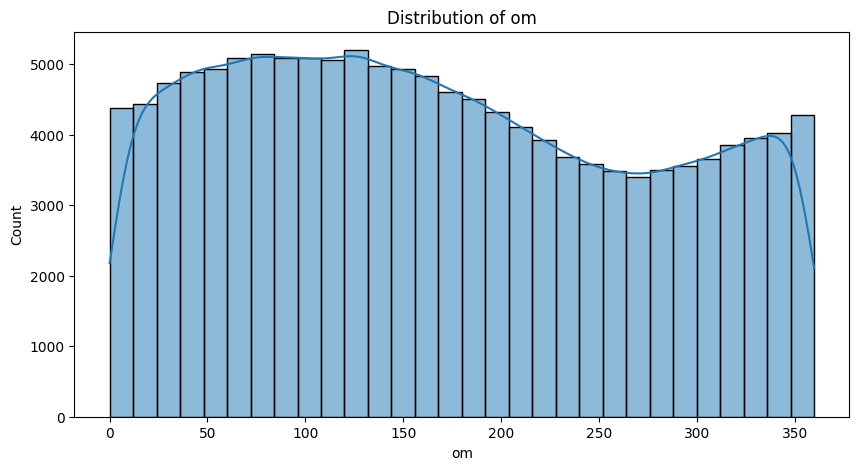

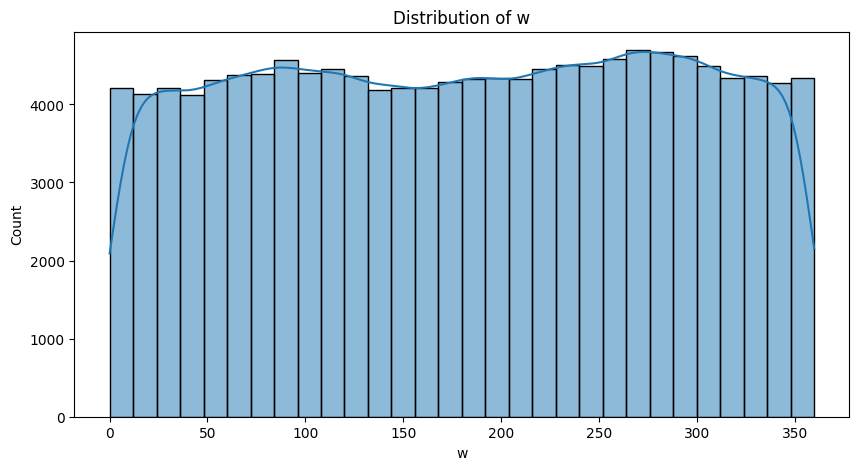

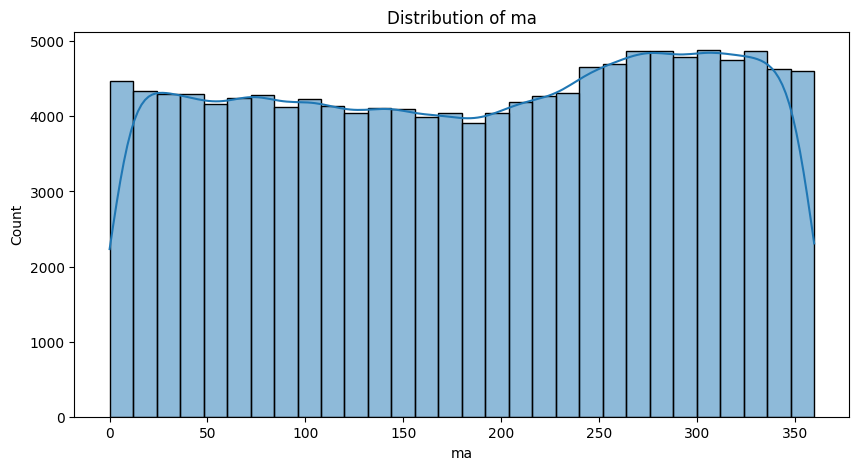

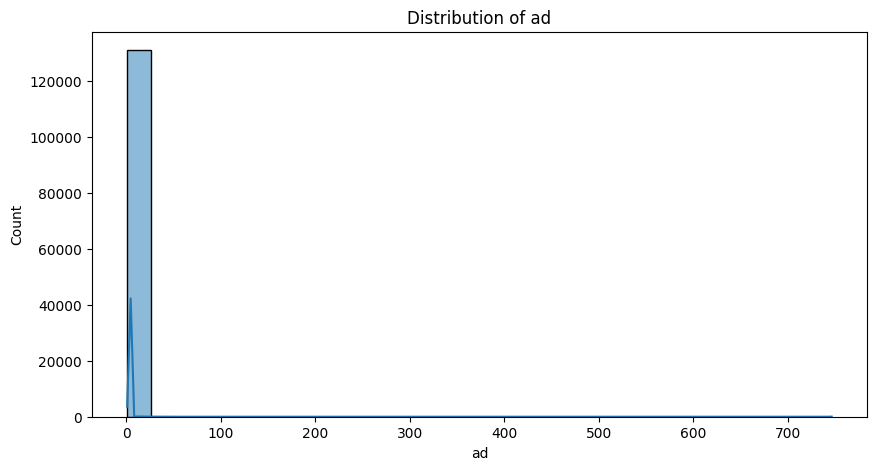

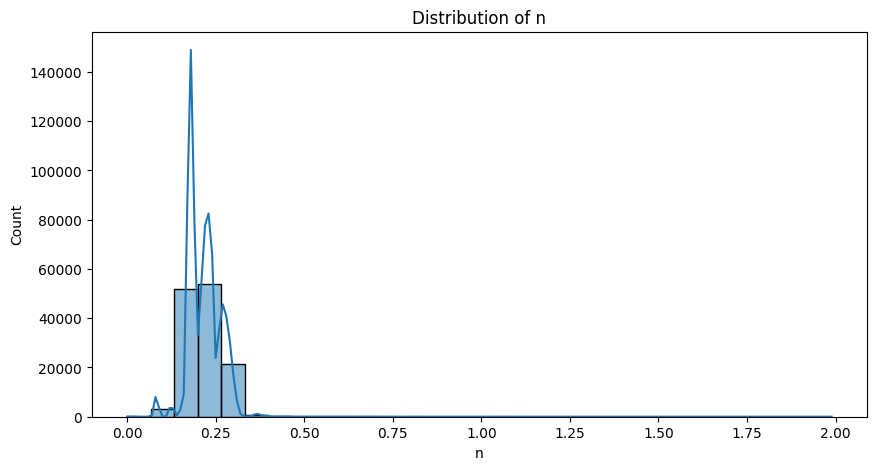

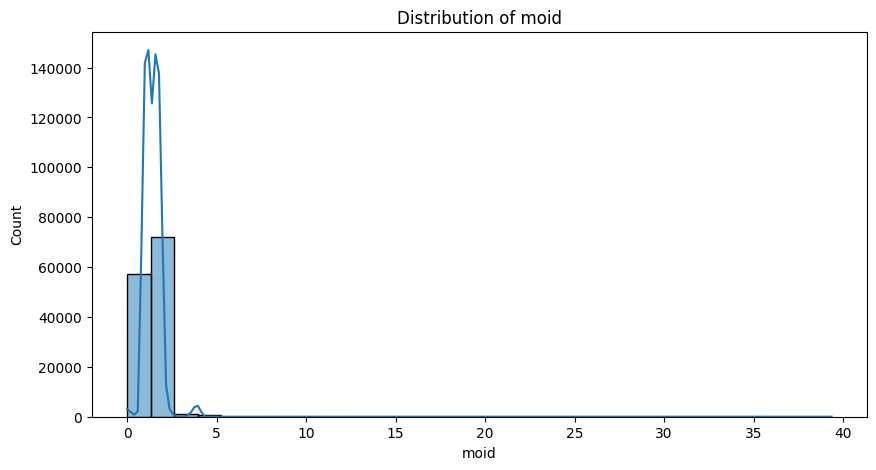

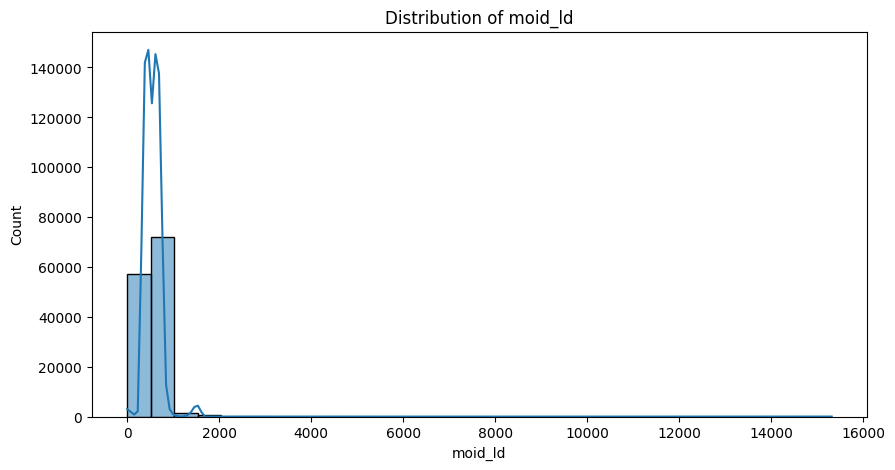

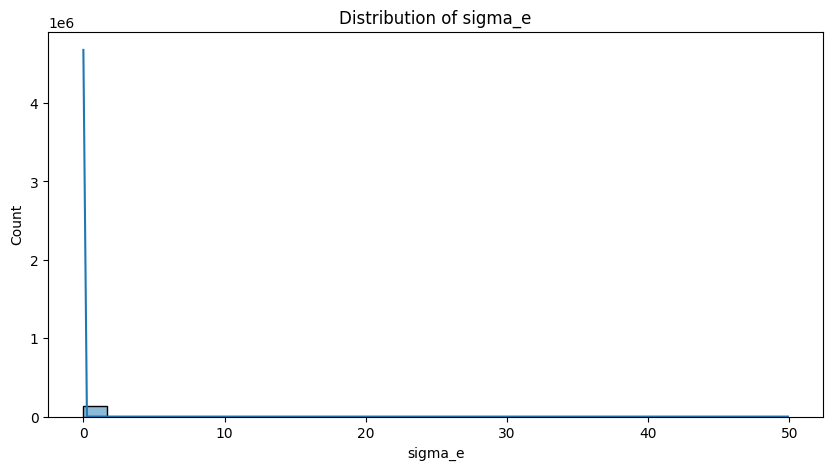

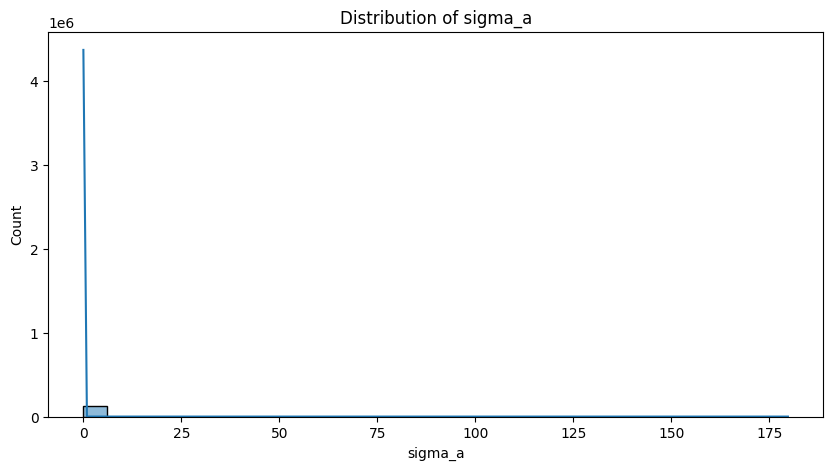

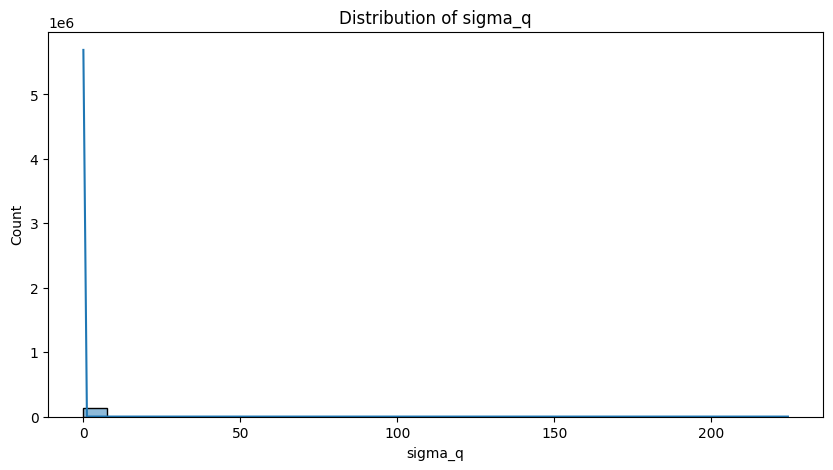

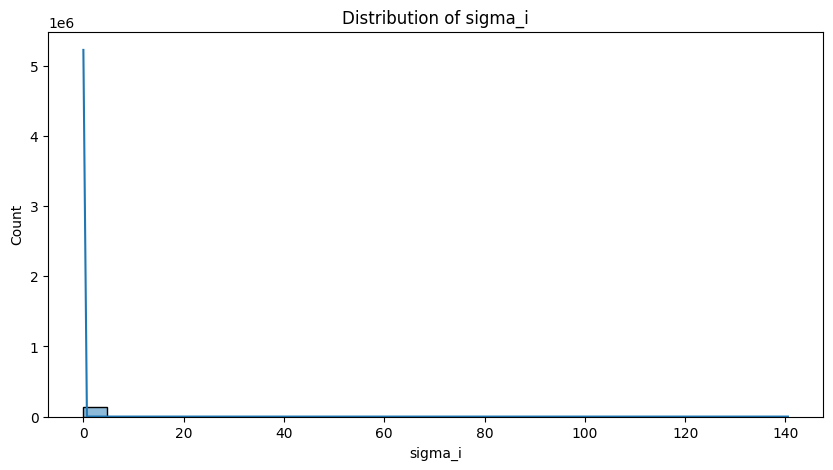

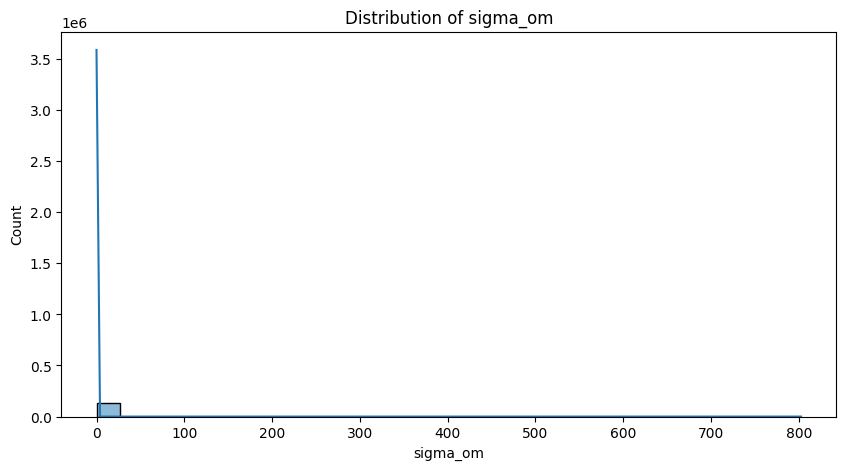

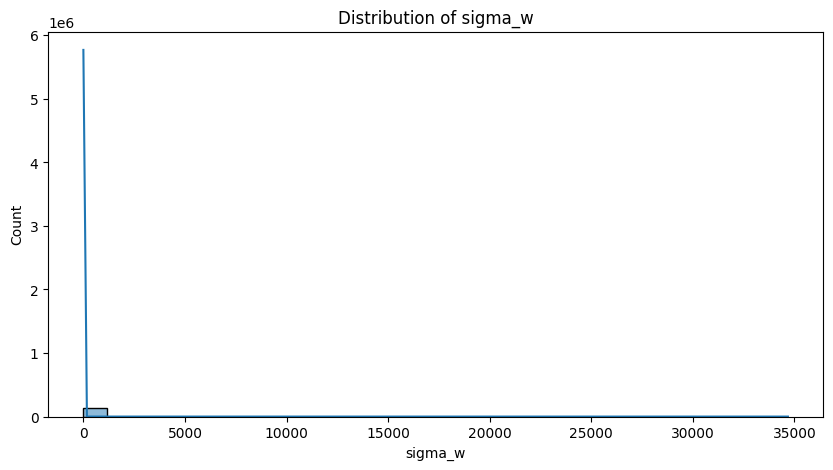

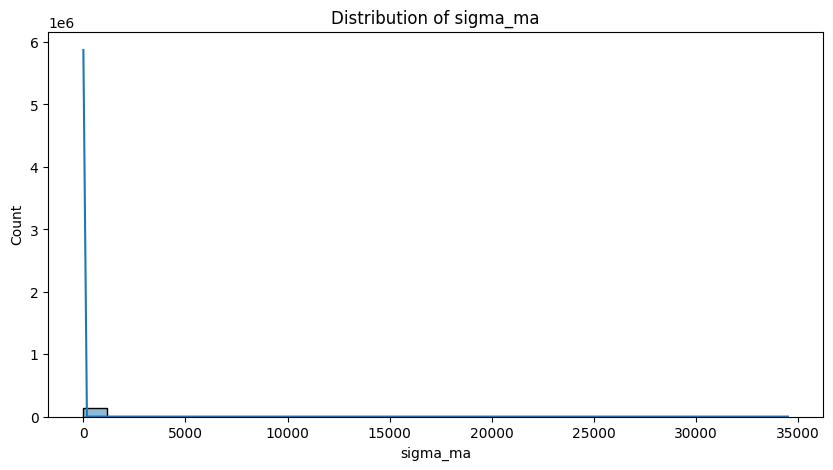

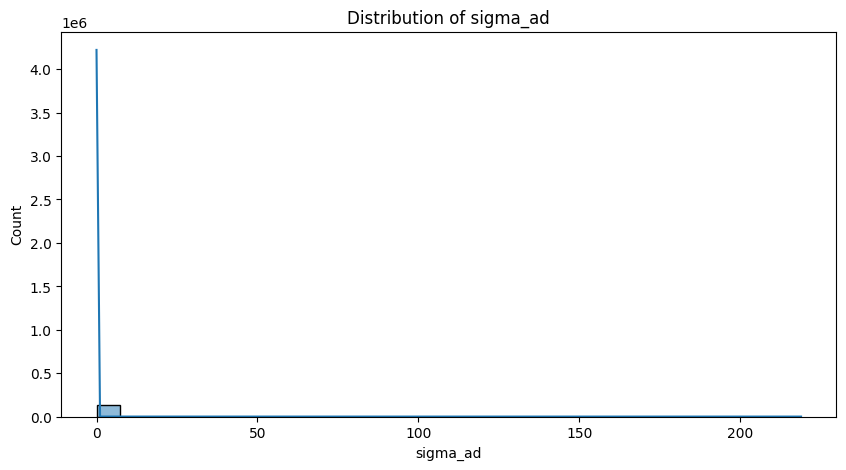

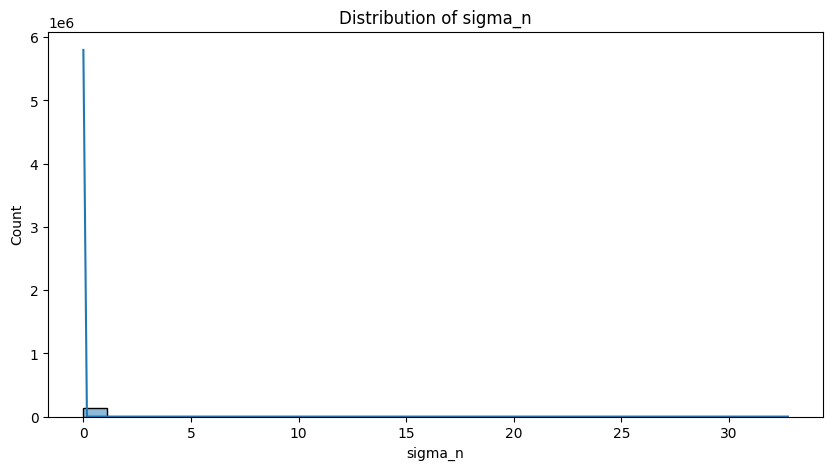

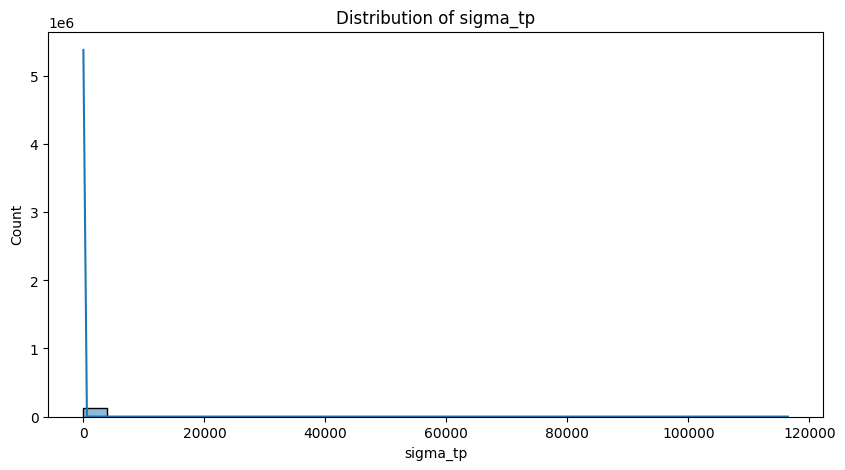

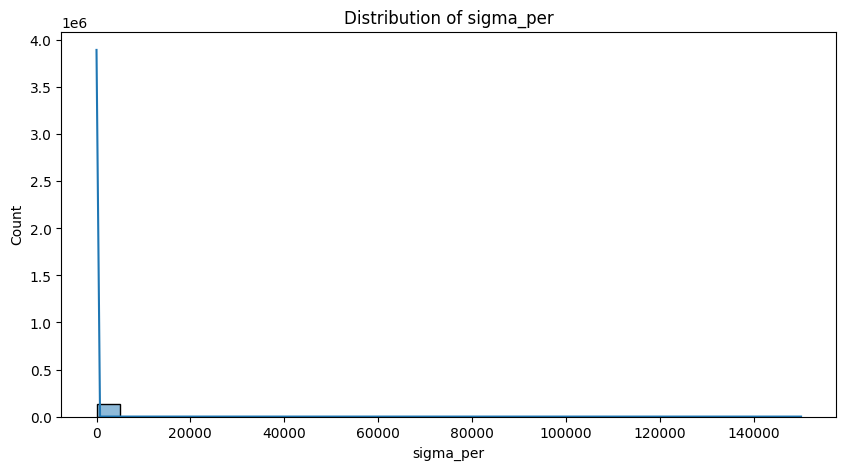

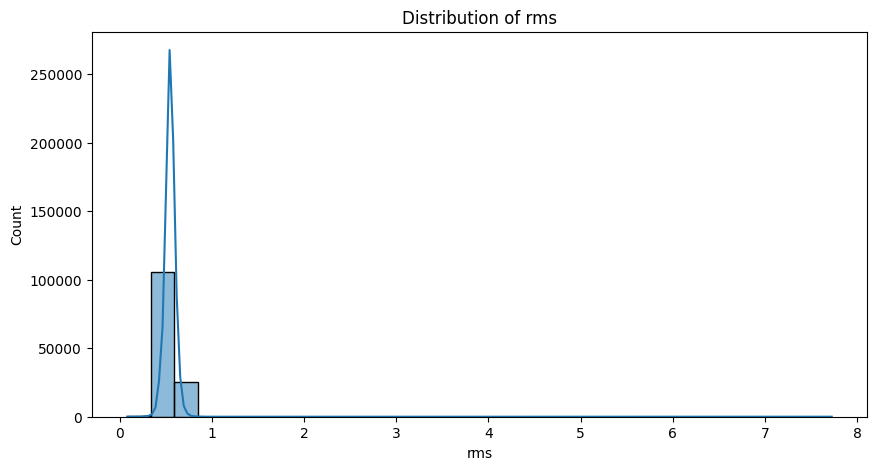

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


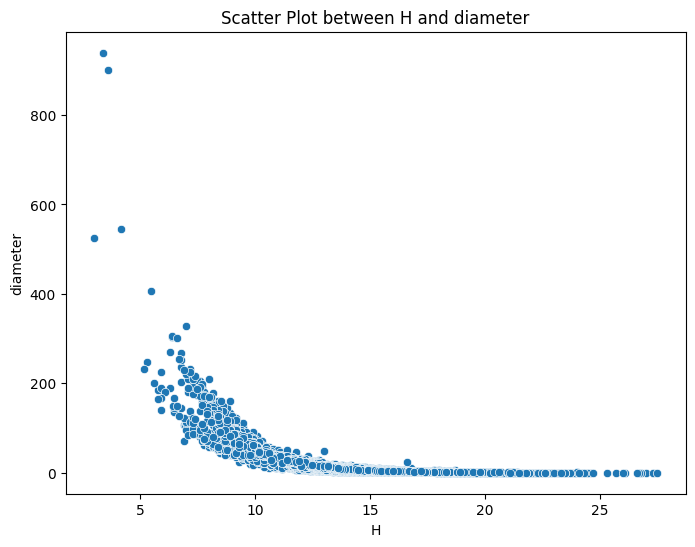

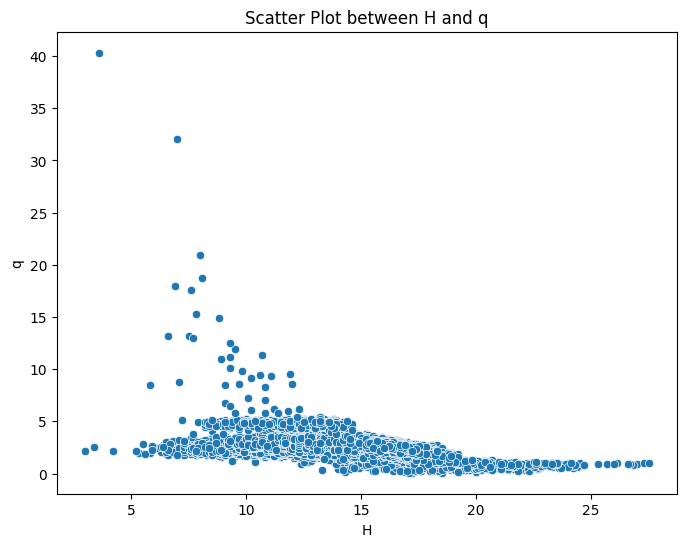

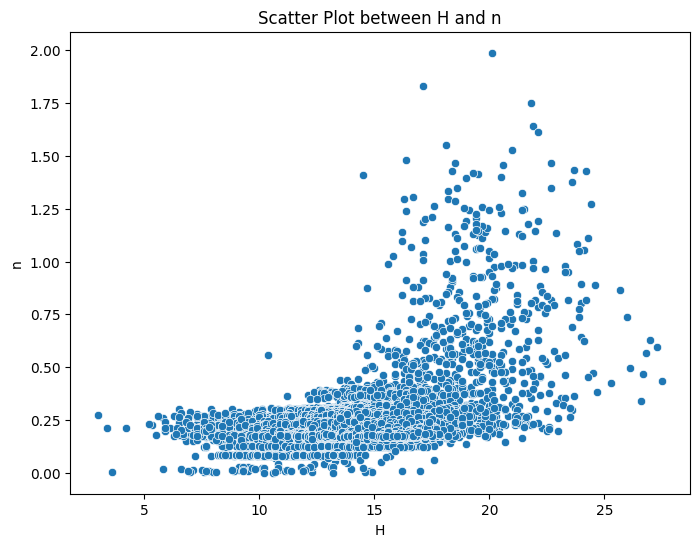

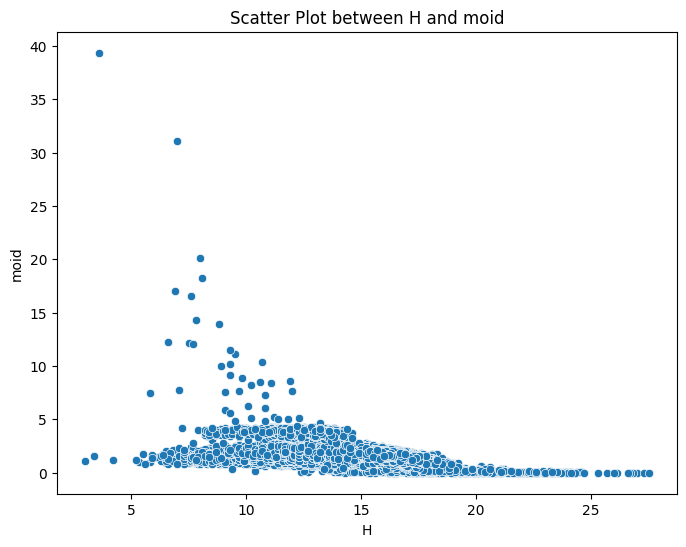

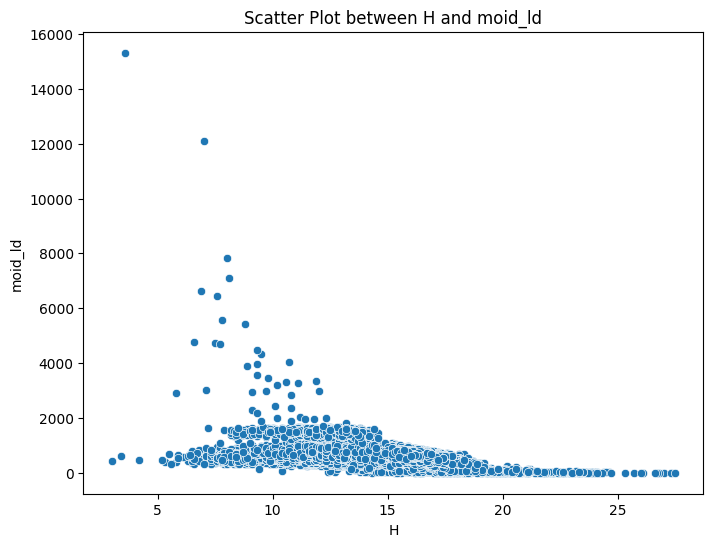

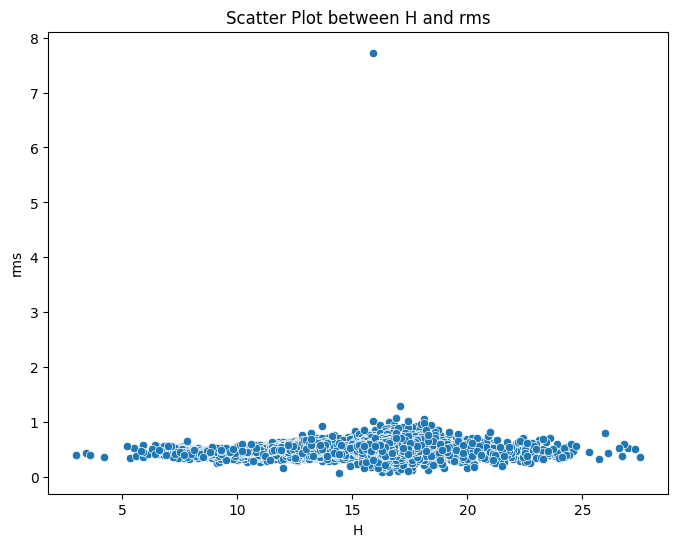

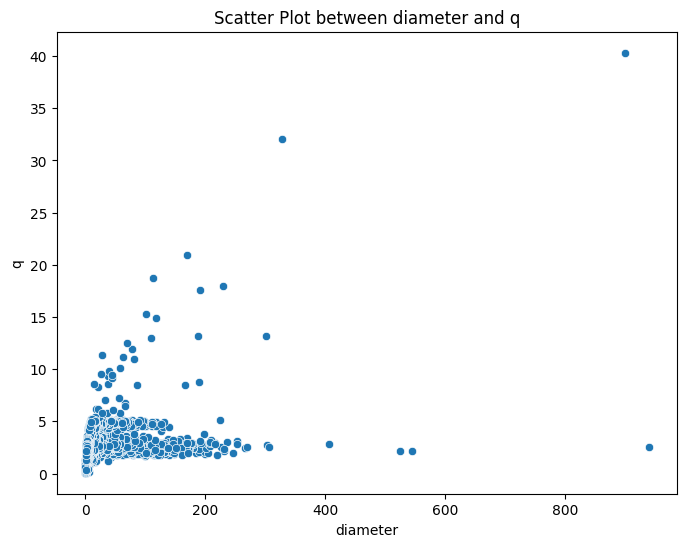

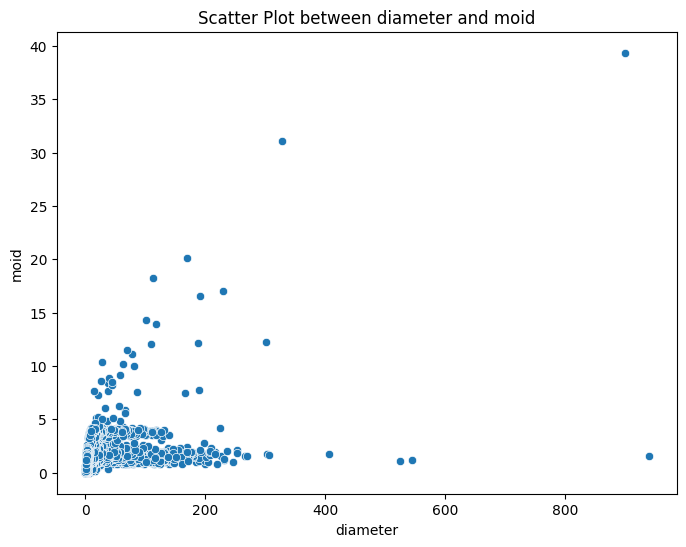

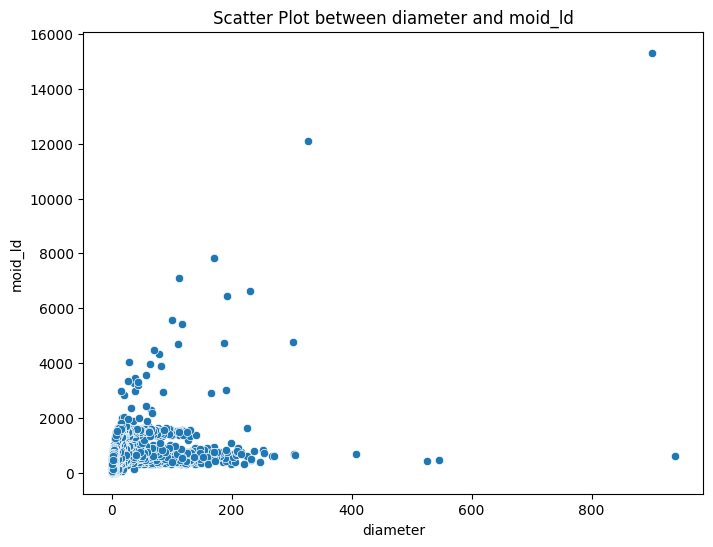

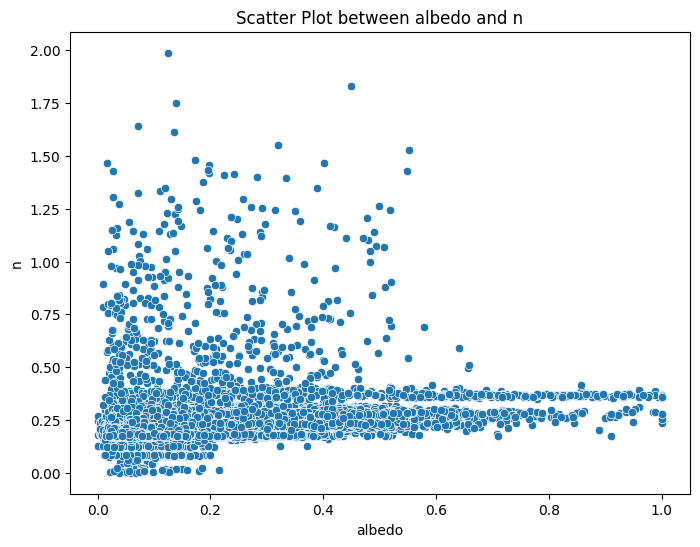

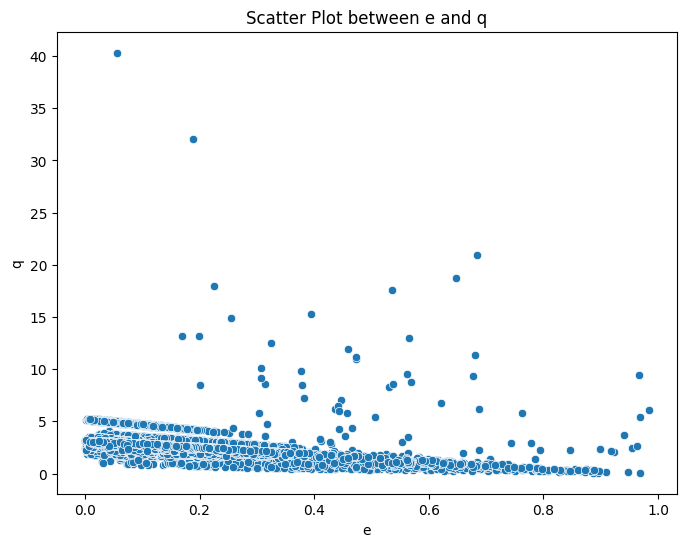

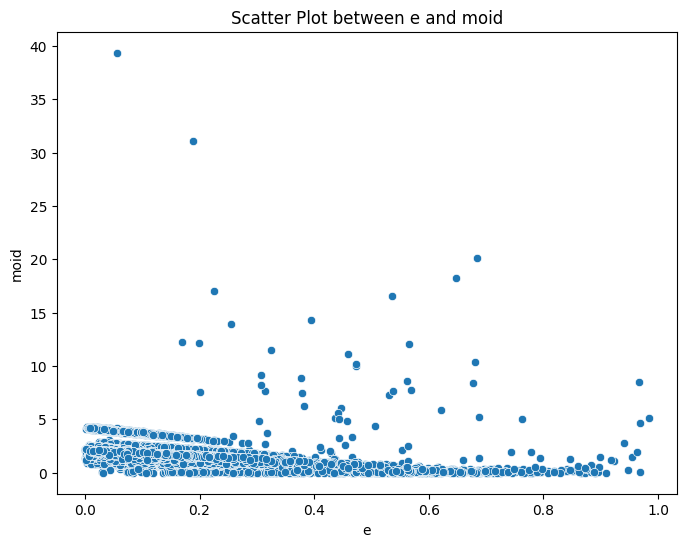

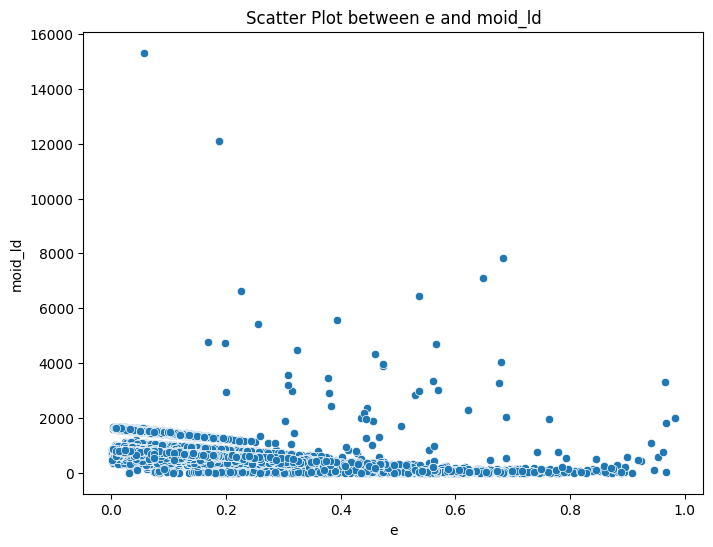

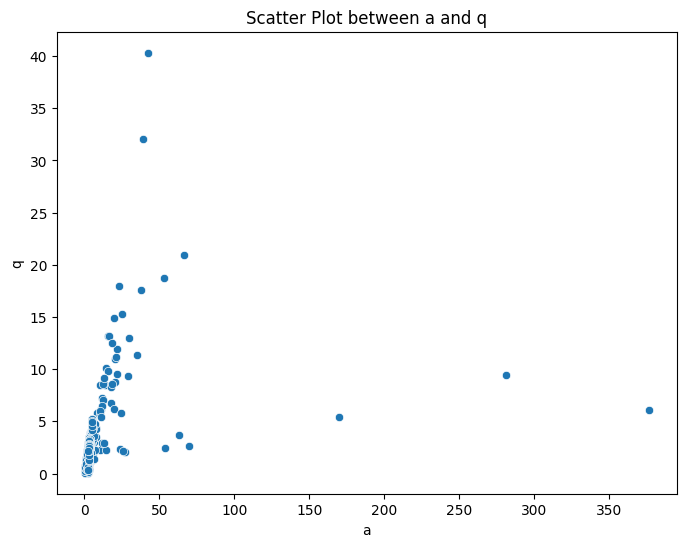

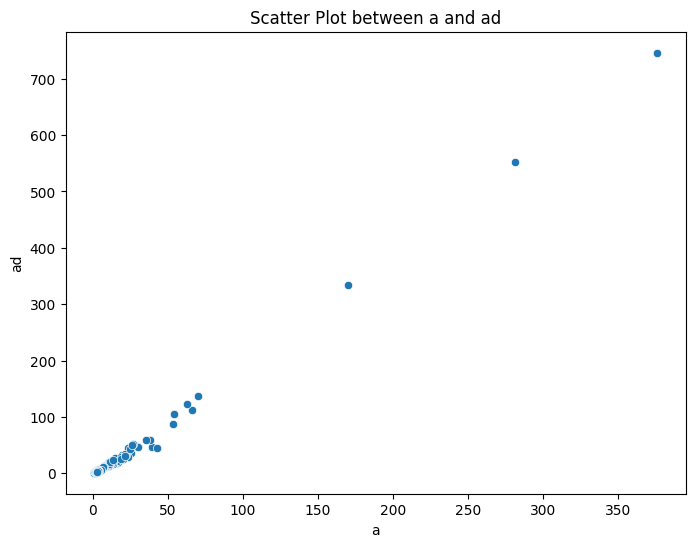

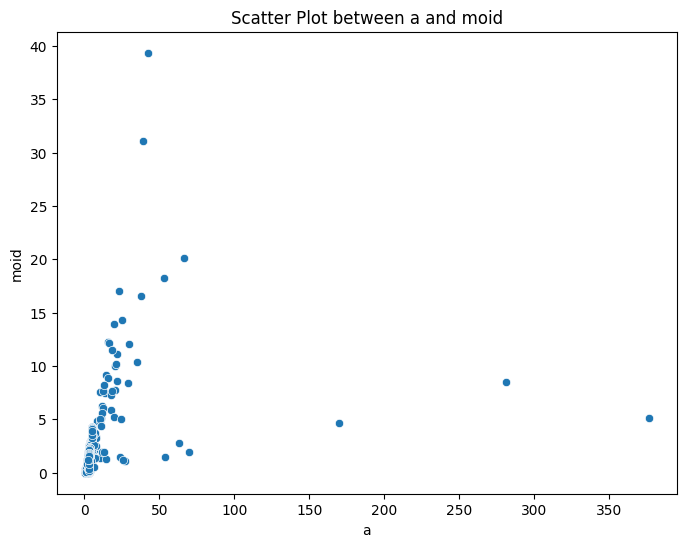

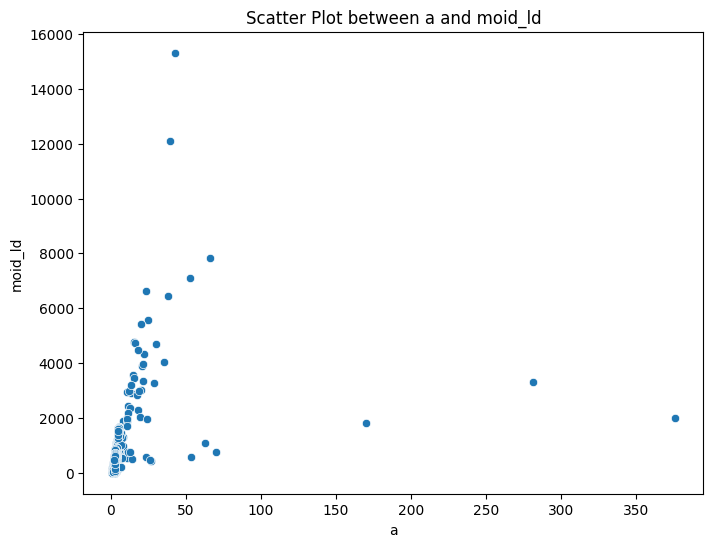

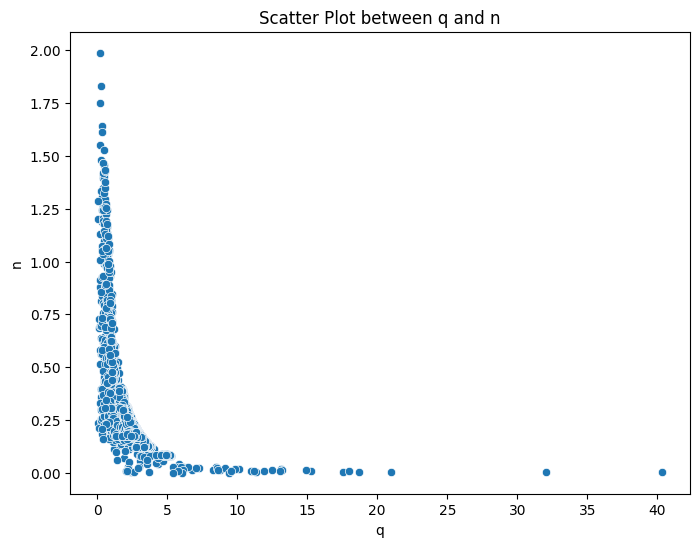

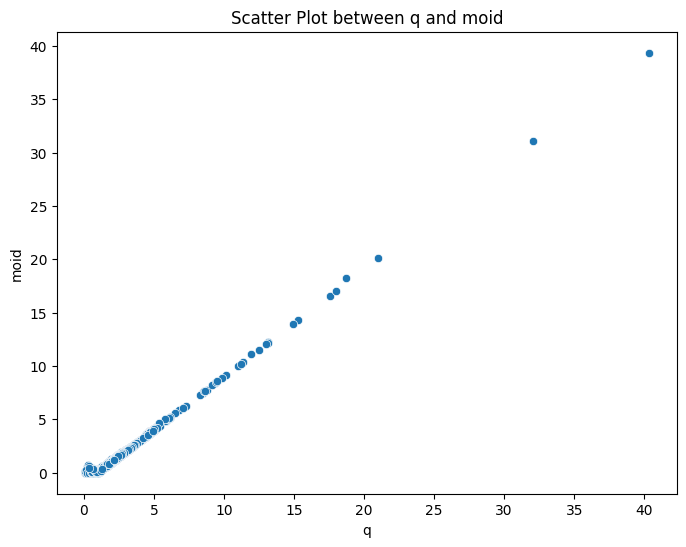

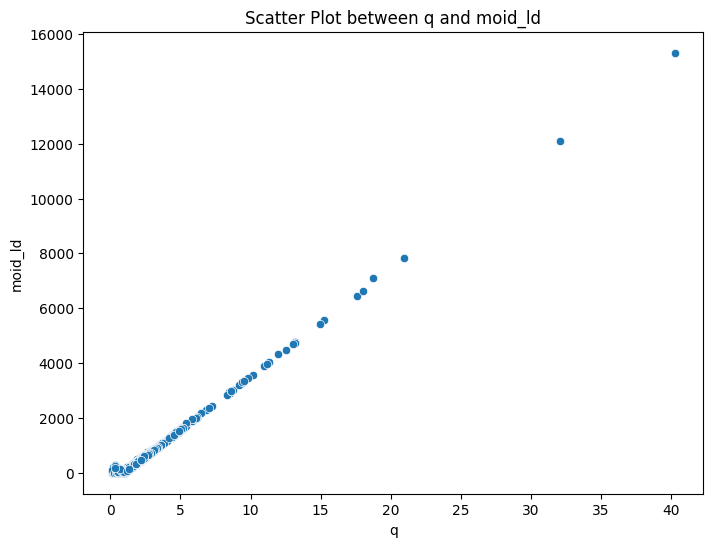

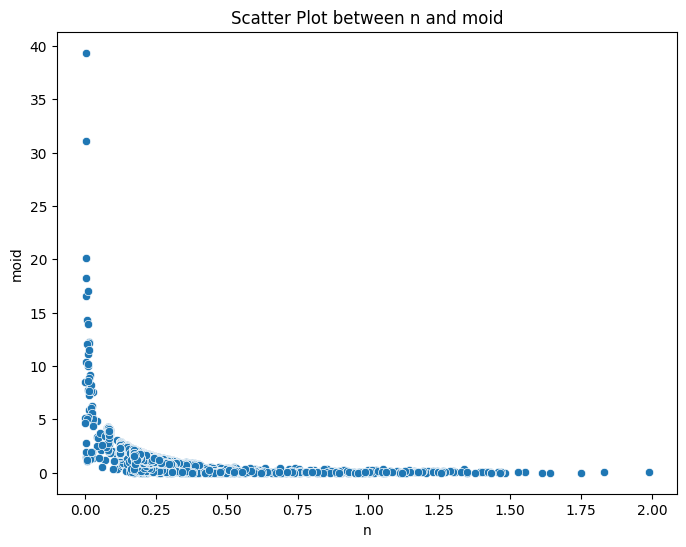

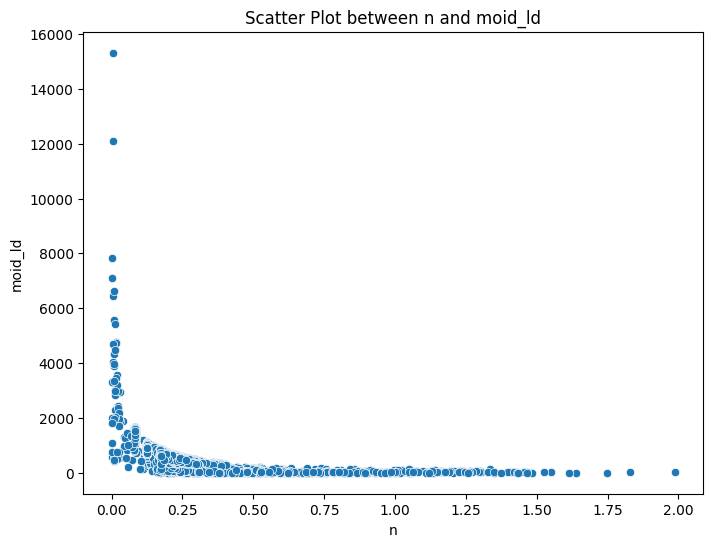

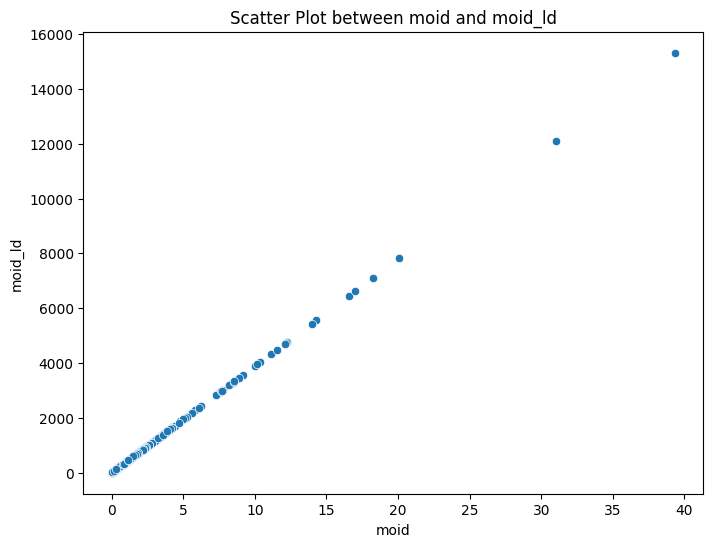

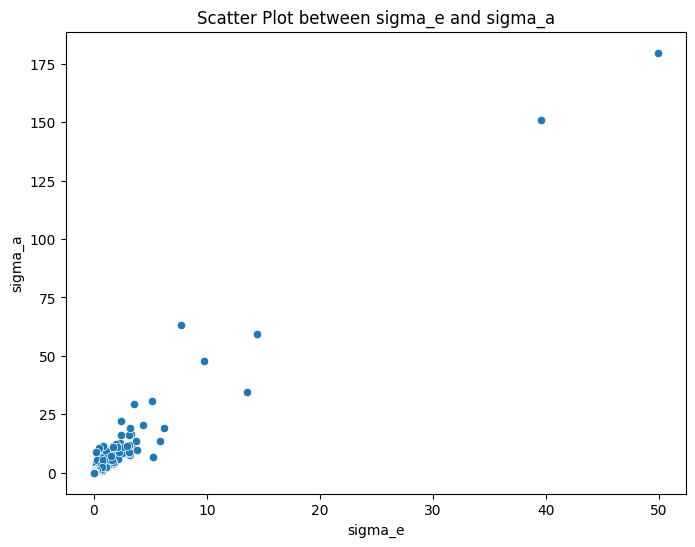

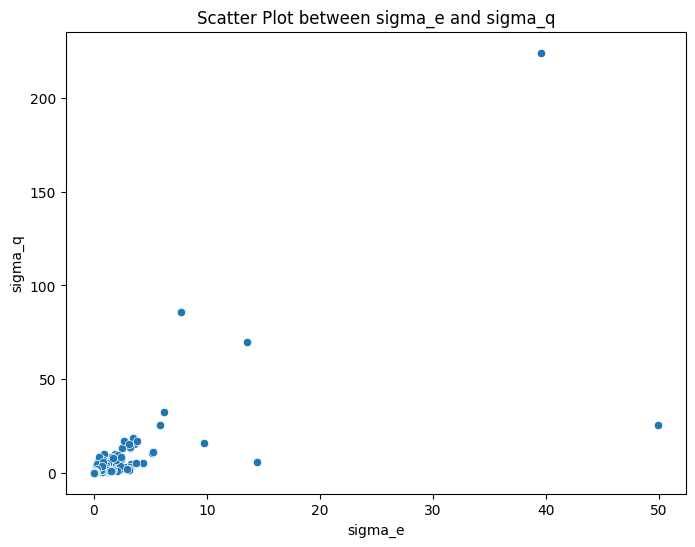

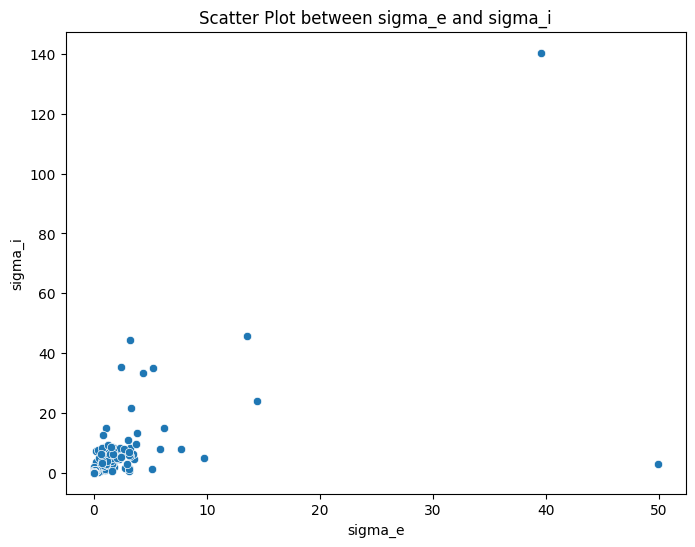

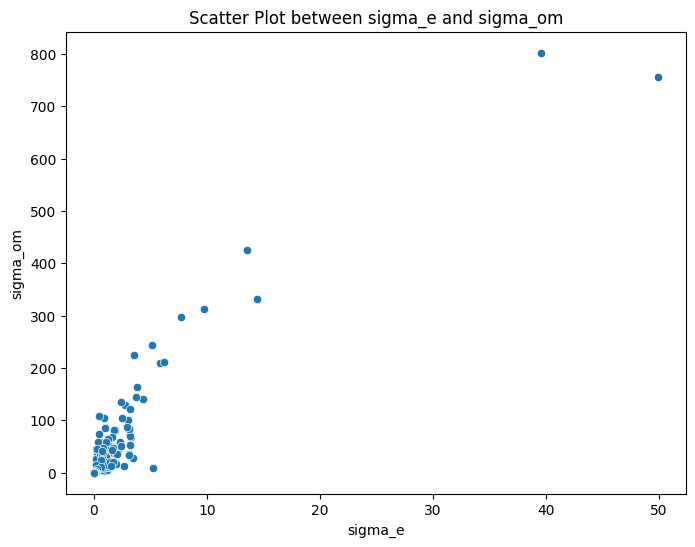

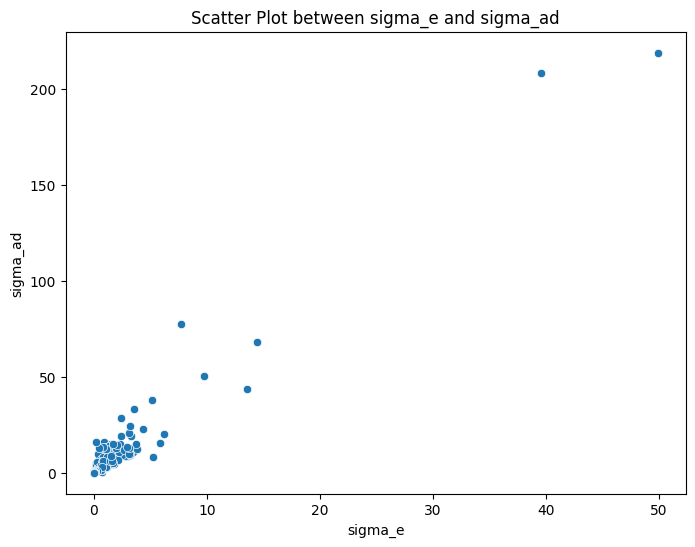

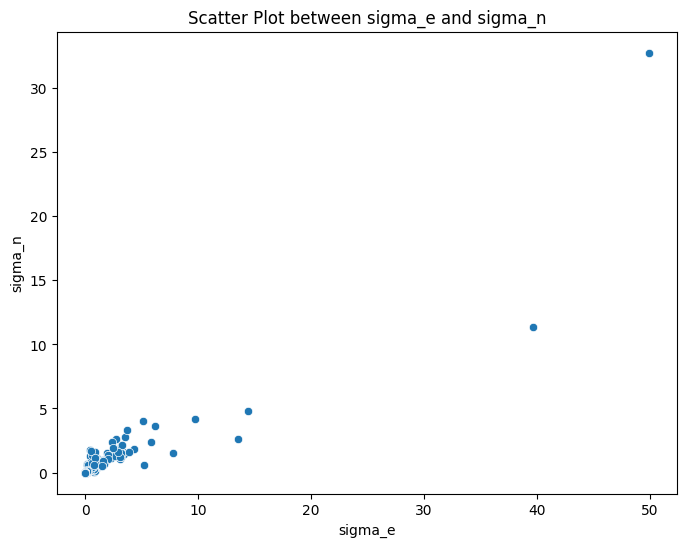

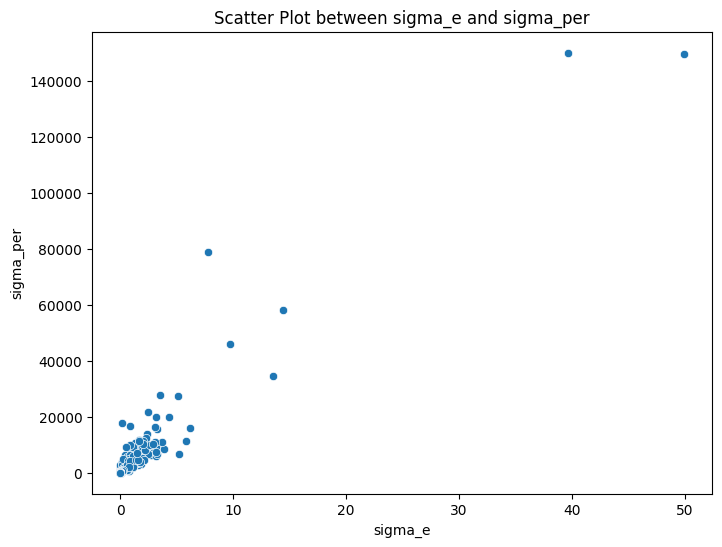

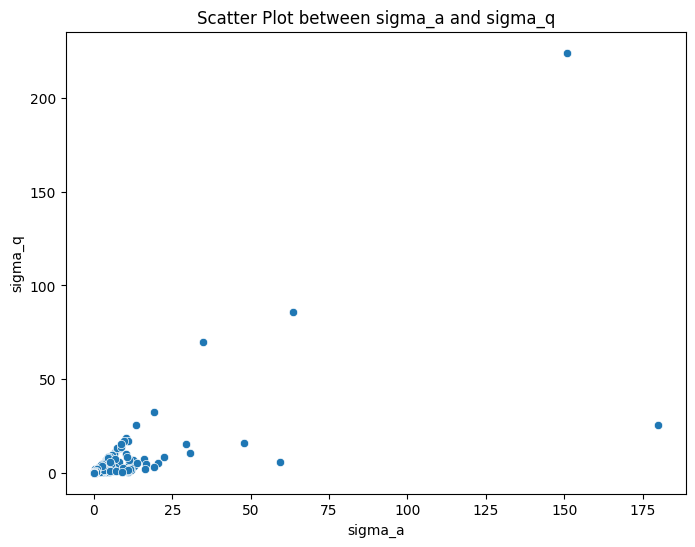

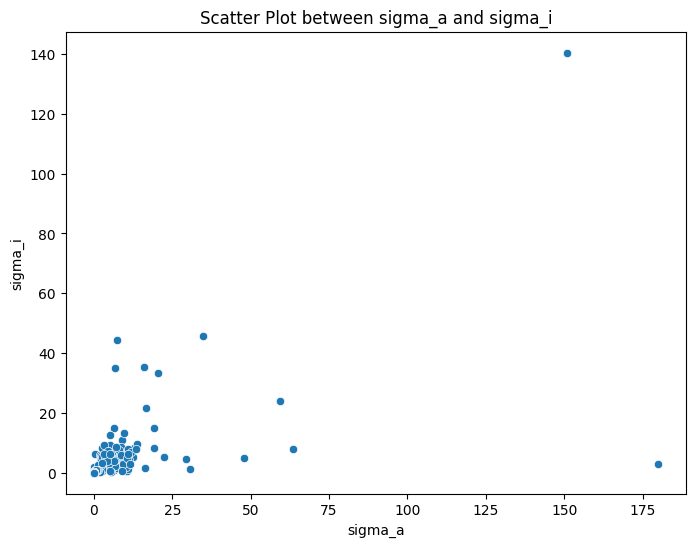

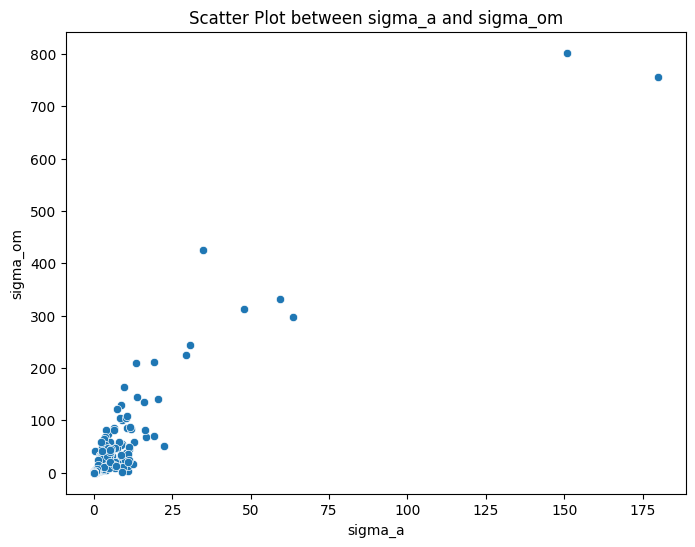

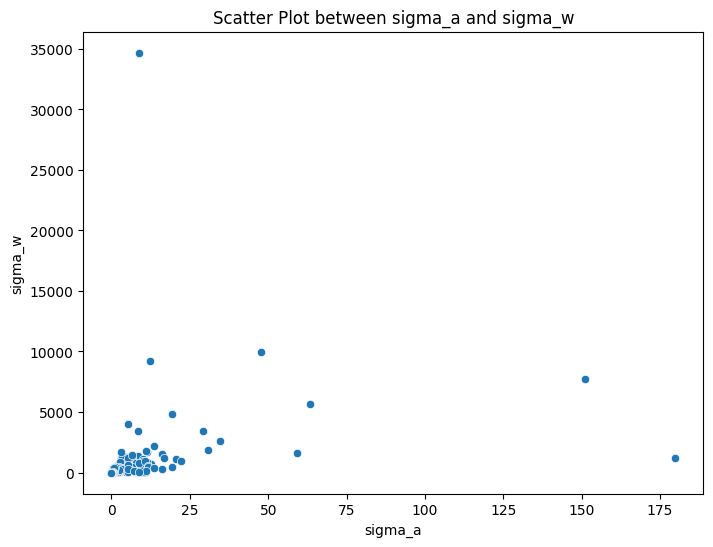

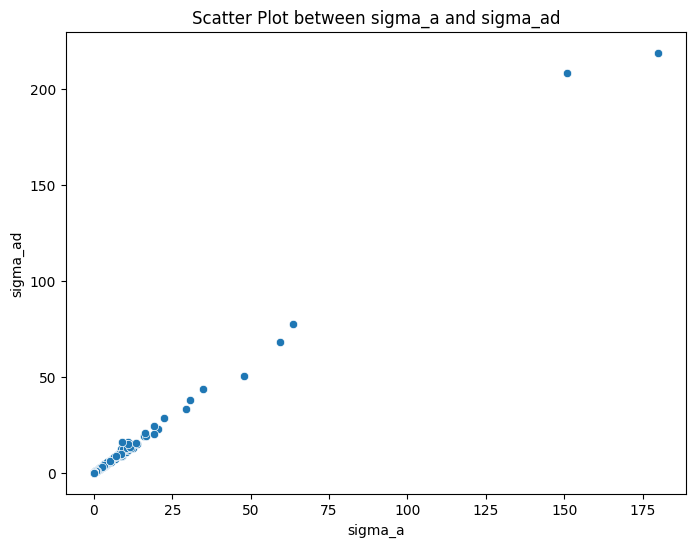

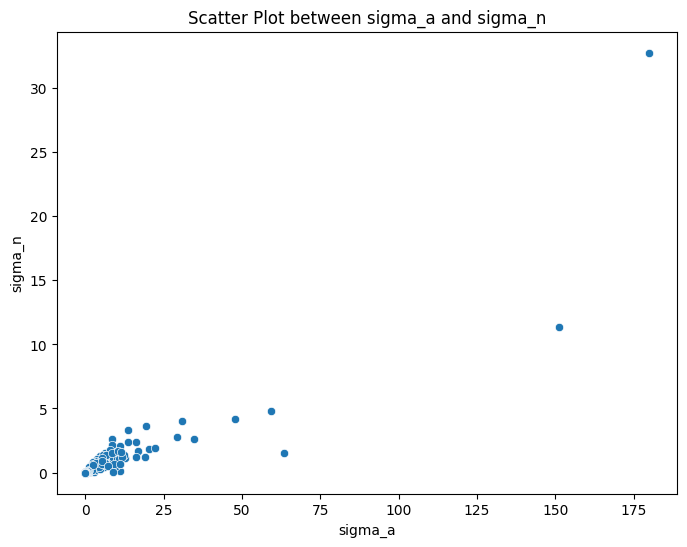

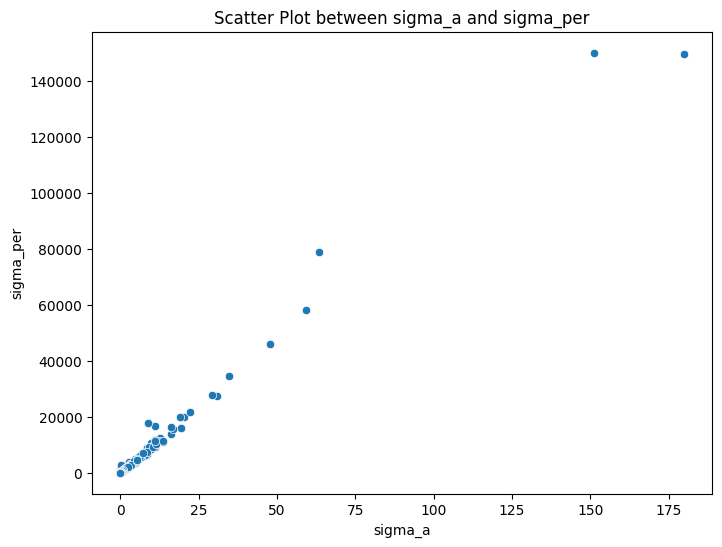

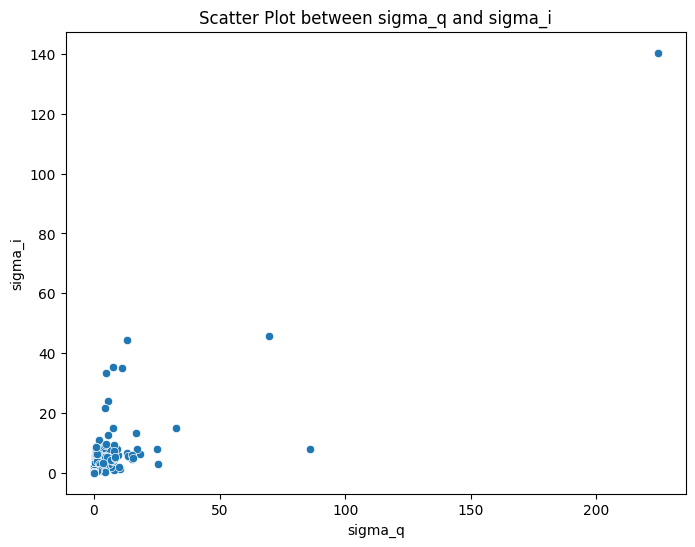

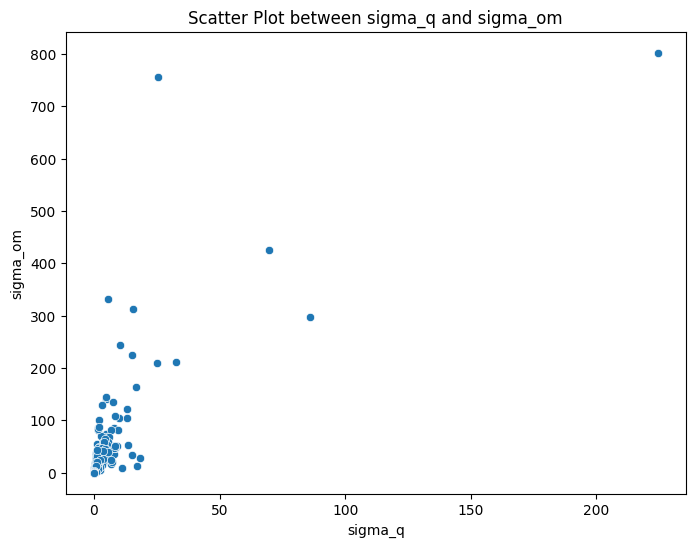

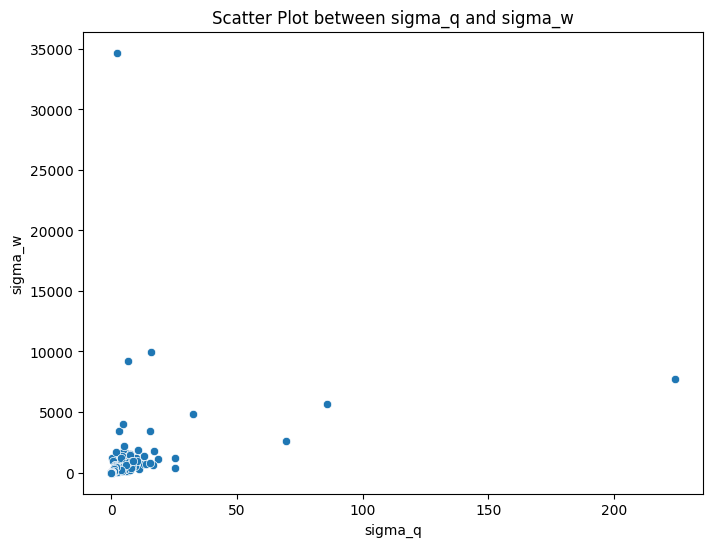

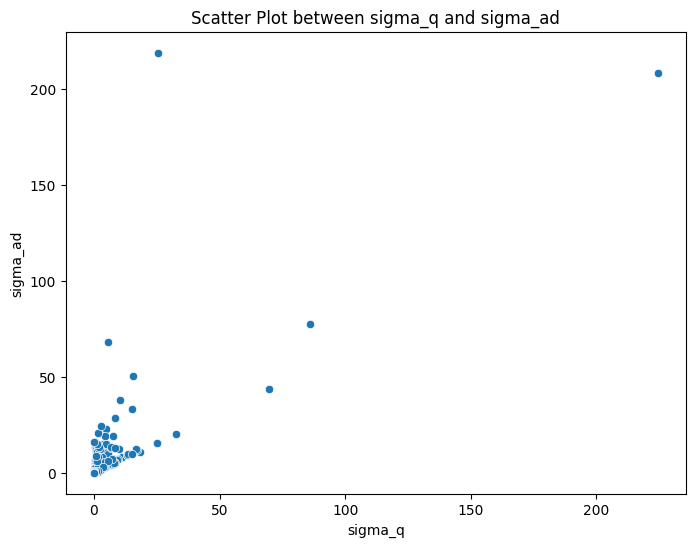

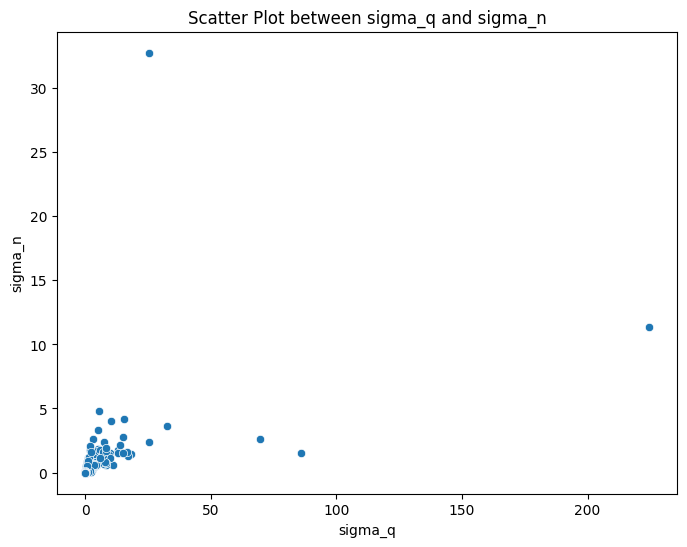

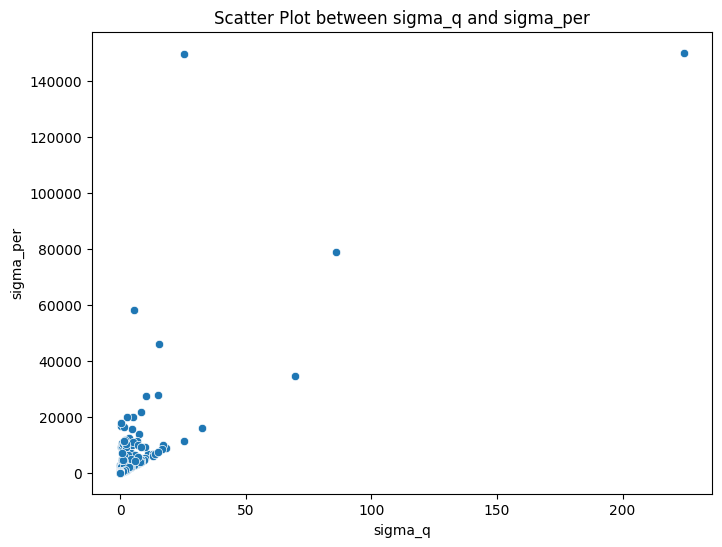

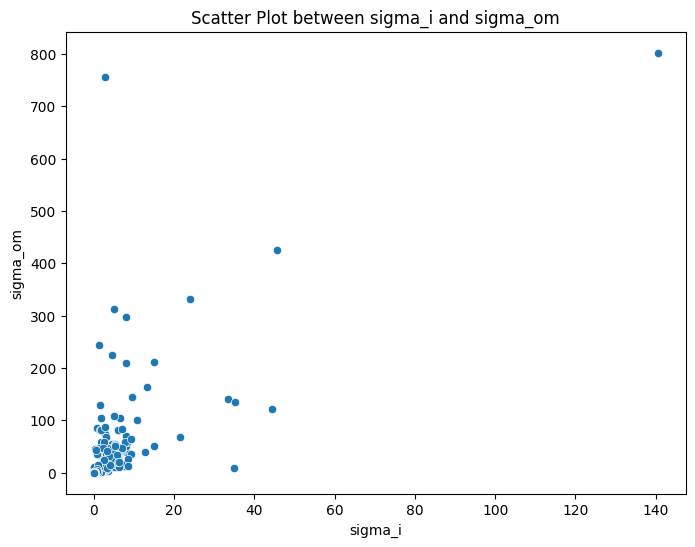

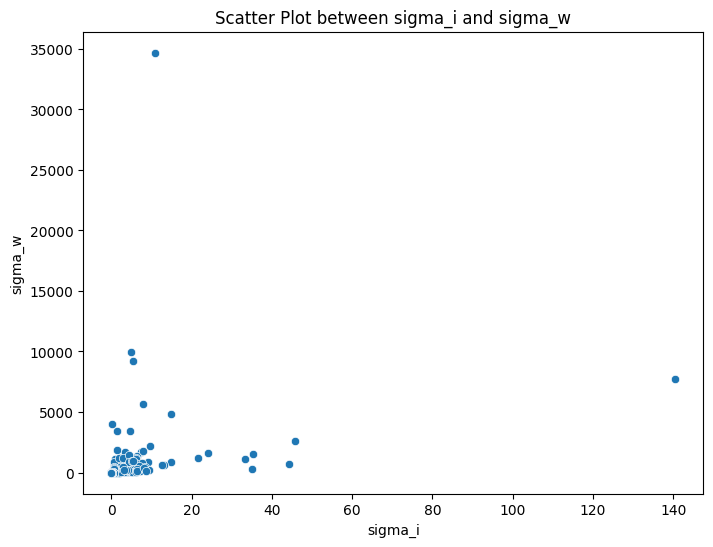

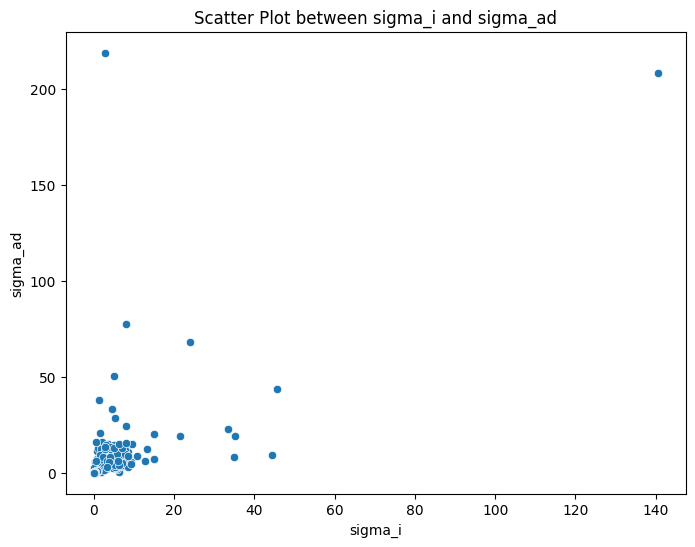

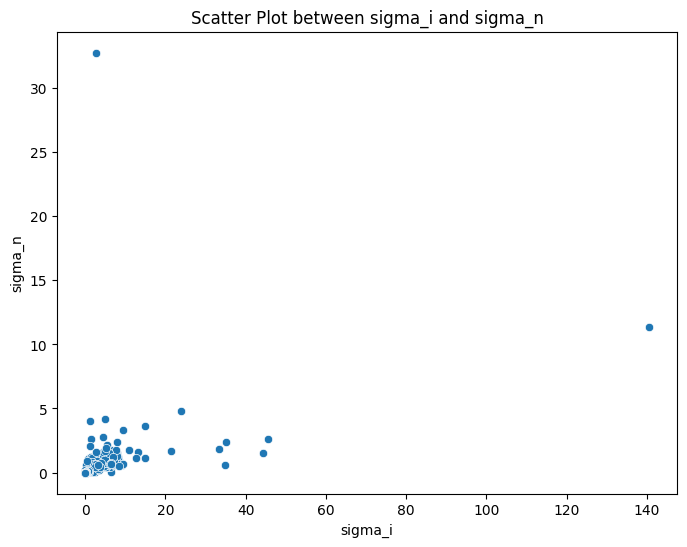

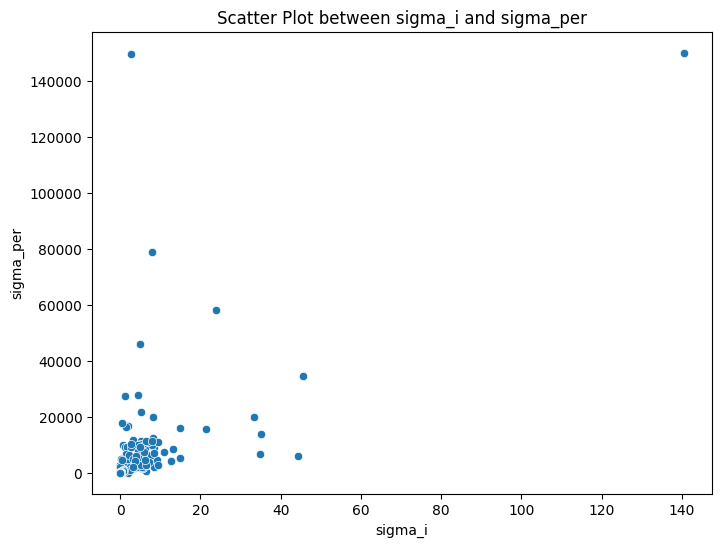

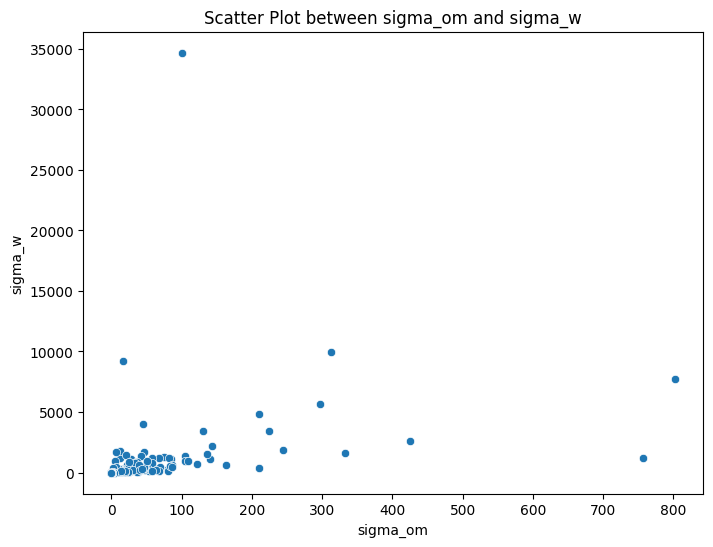

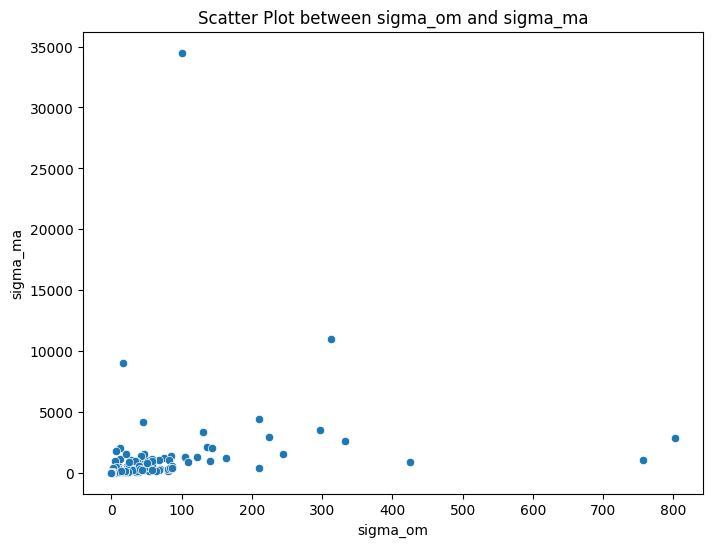

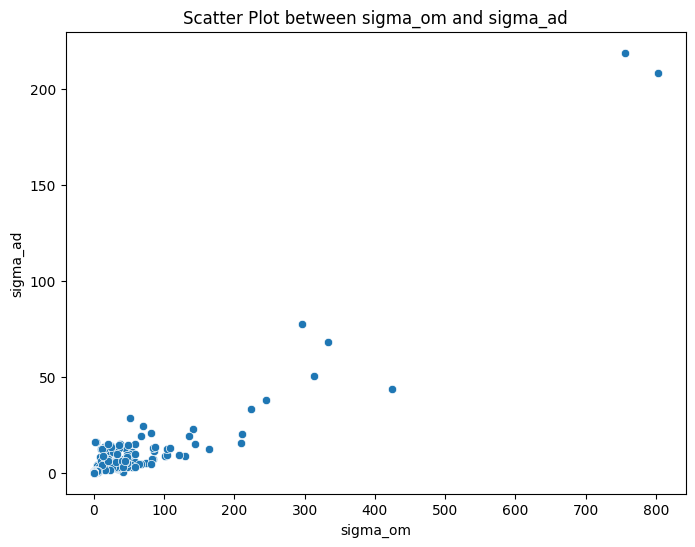

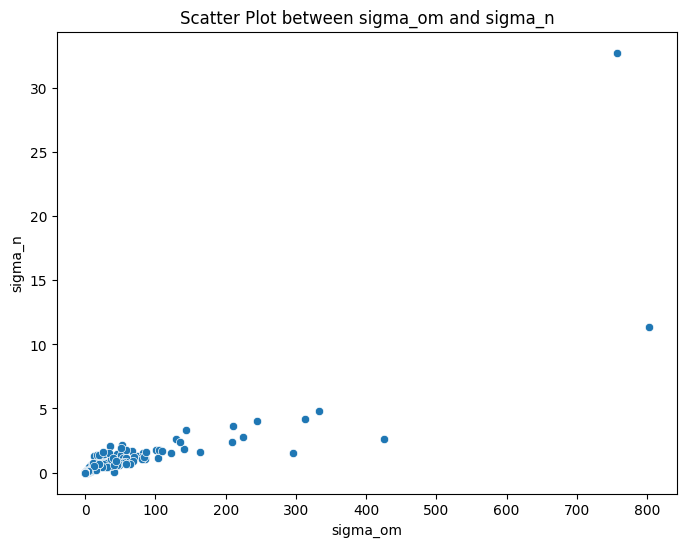

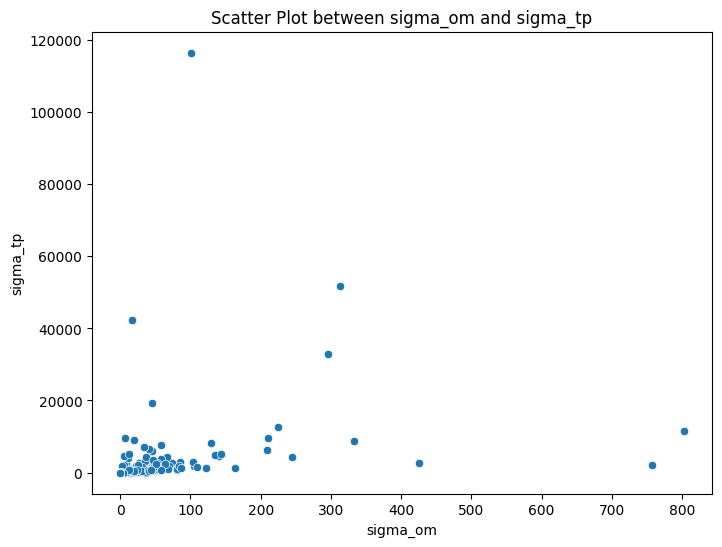

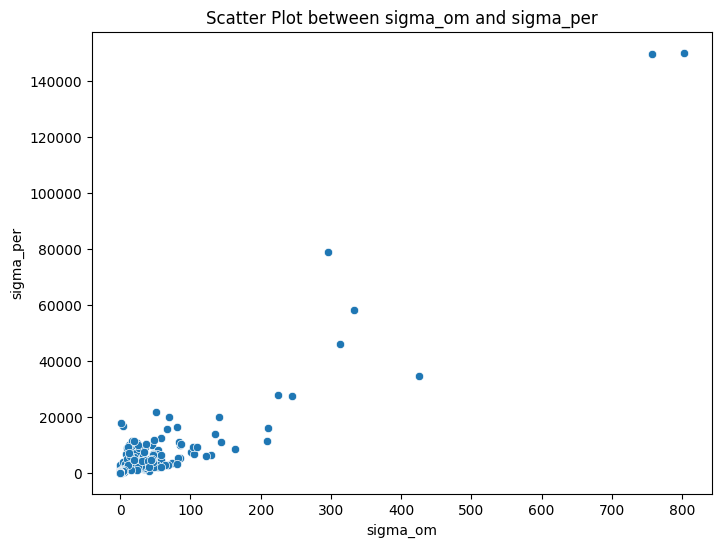

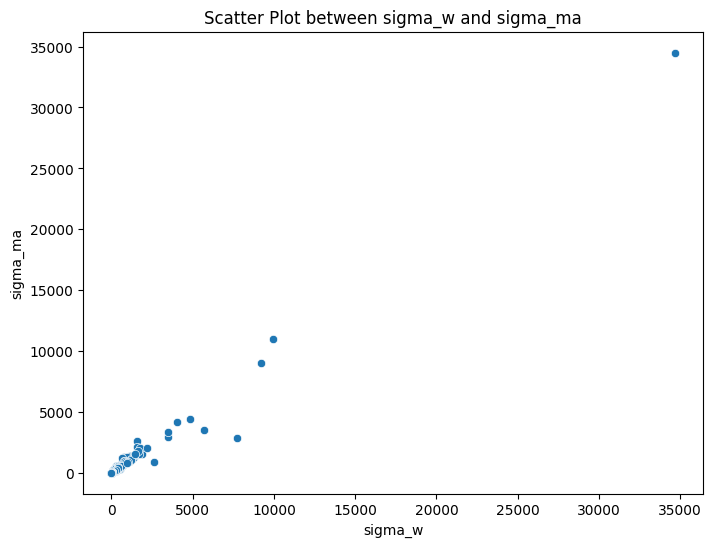

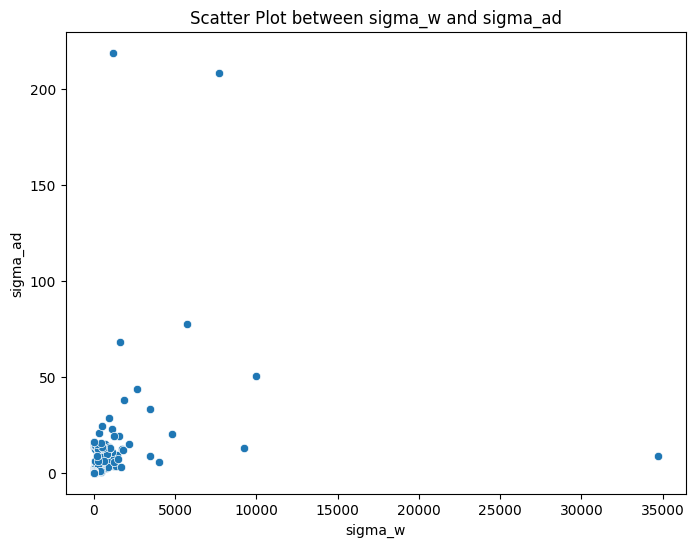

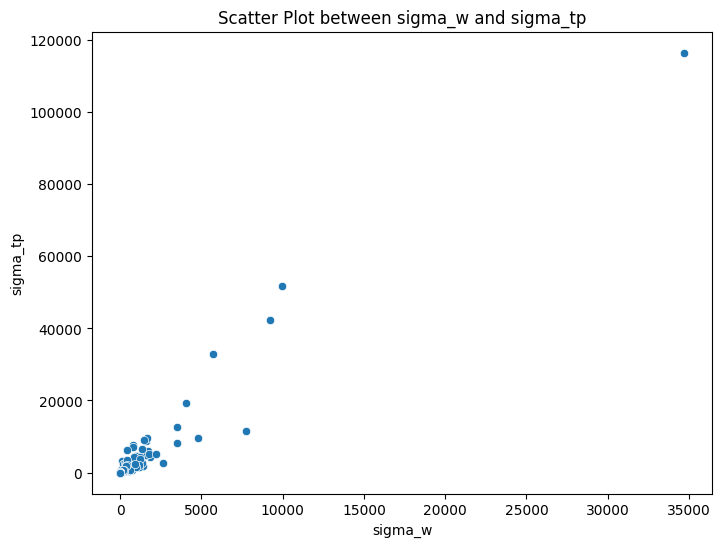

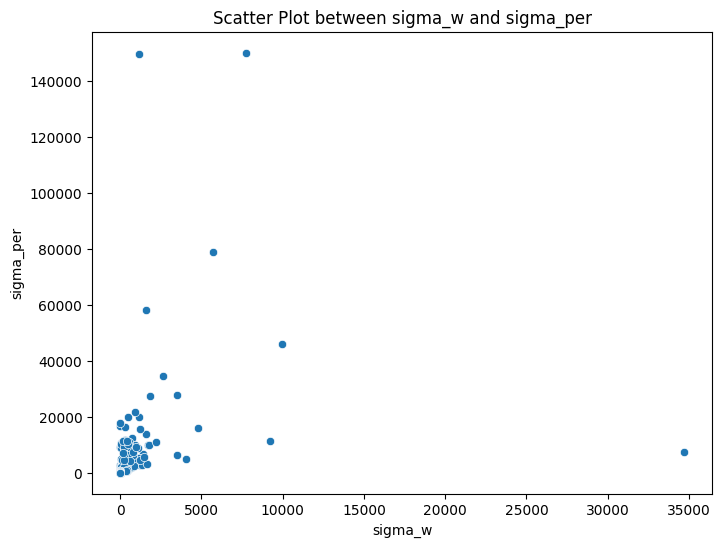

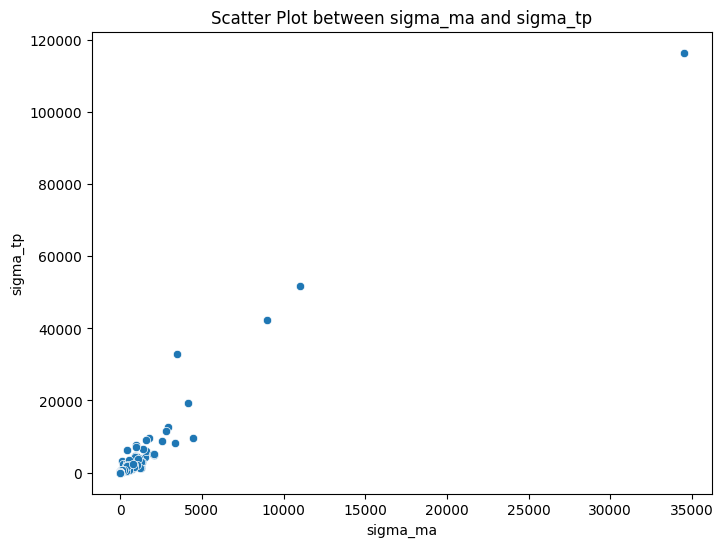

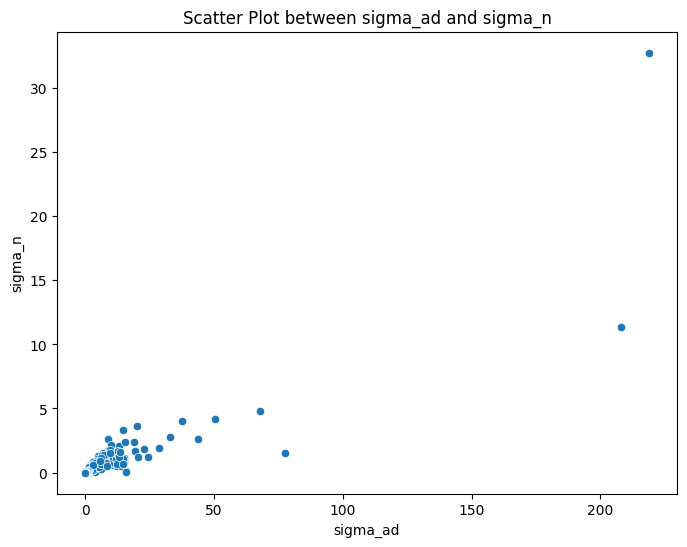

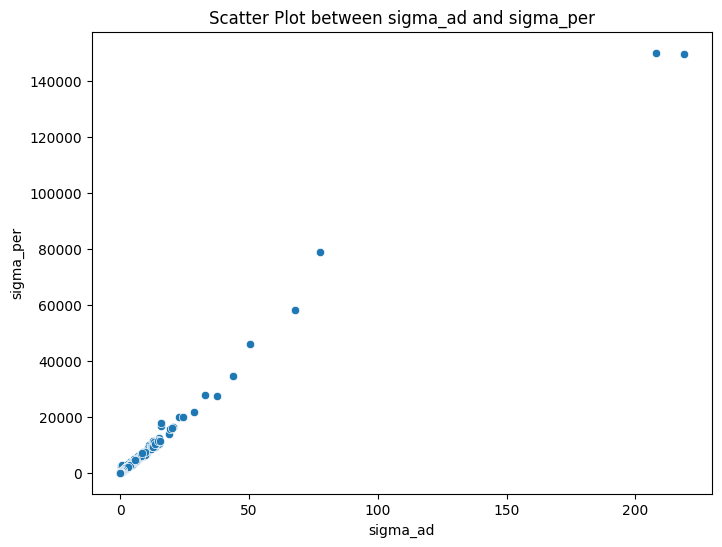

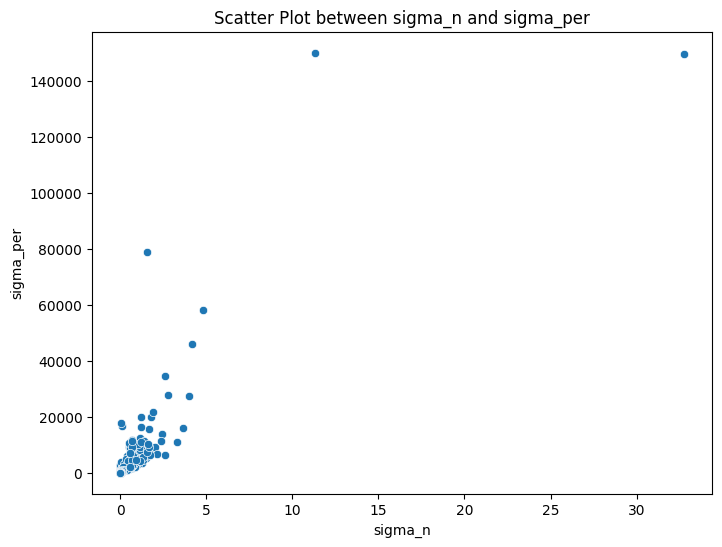

In [29]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()


threshold = 0.3
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2))


for col1, col2 in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=numeric_df[col1], y=numeric_df[col2])
    plt.title(f'Scatter Plot between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


features with stronge correlation with diameter ['H', 'q', 'moid', 'moid_ld']


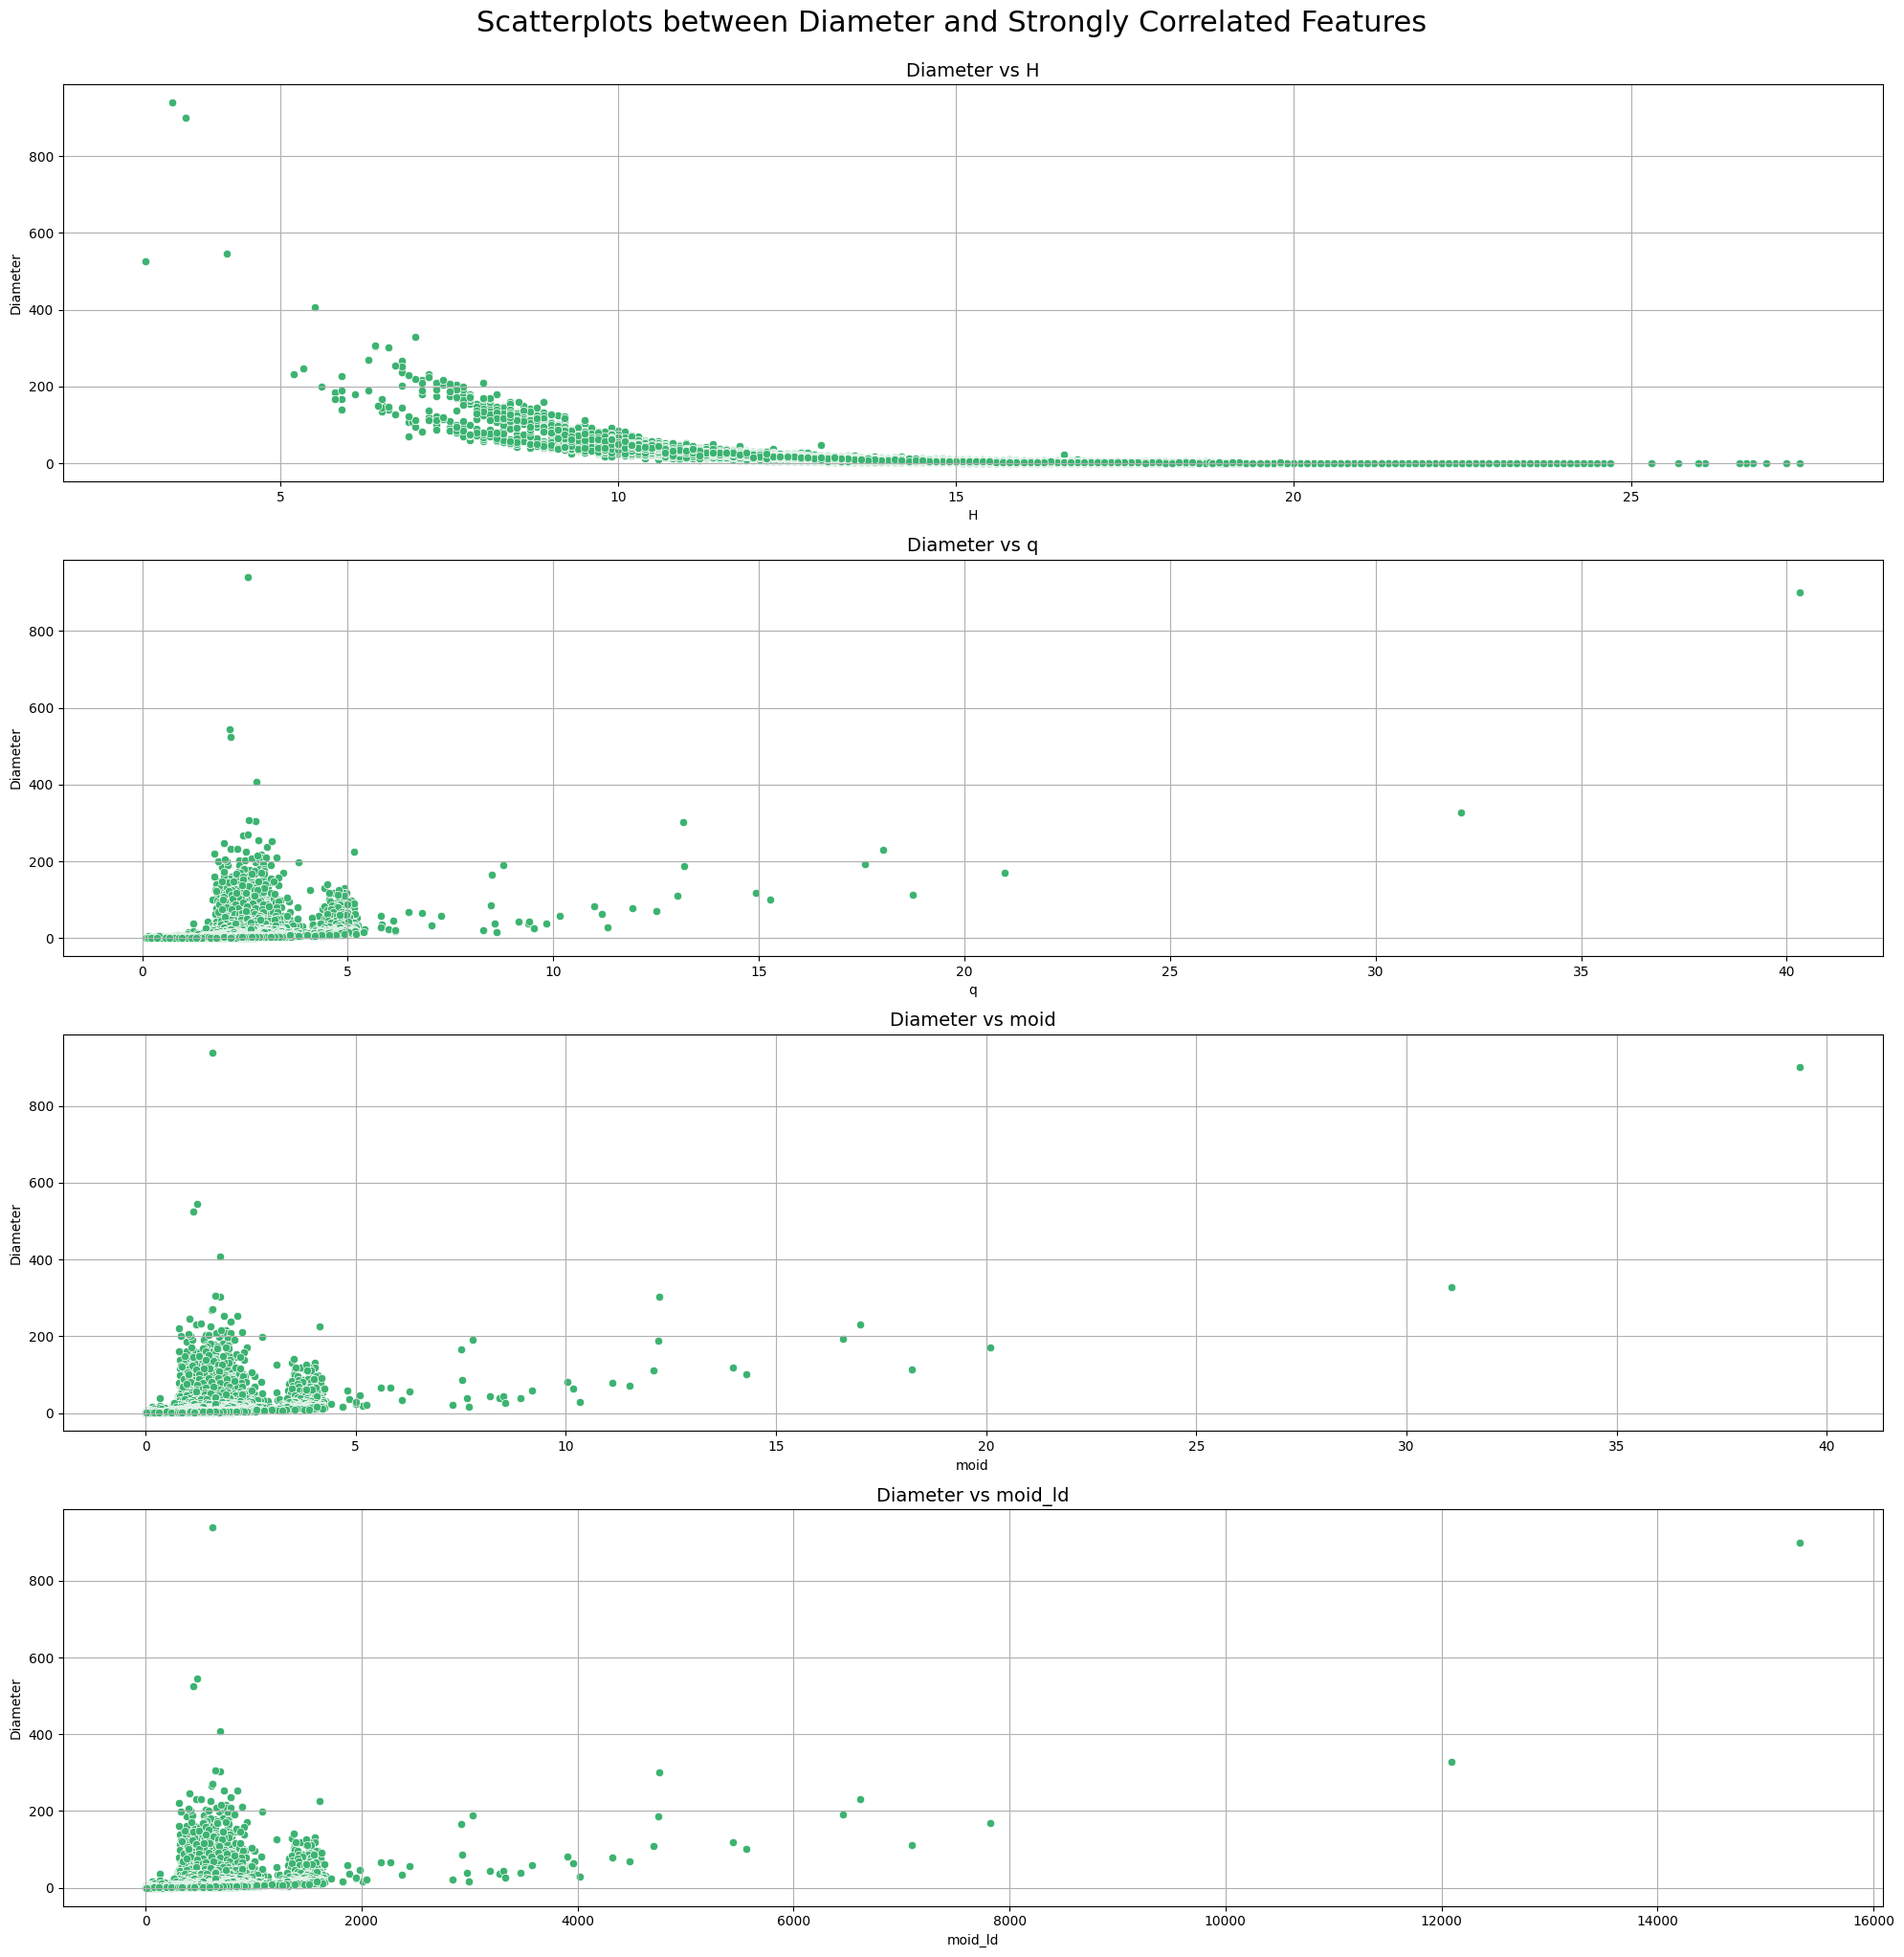

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


corr_matrix = df[numeric_cols].corr()


strong_corr_features = corr_matrix['diameter'][abs(corr_matrix['diameter']) > 0.3].drop('diameter').index.tolist()

print("features with stronge correlation with diameter", strong_corr_features)

plt.figure(figsize=(20, len(strong_corr_features) * 5))

for idx, col in enumerate(strong_corr_features, 1):
    plt.subplot(len(strong_corr_features), 1, idx)
    sns.scatterplot(data=df, x=col, y='diameter', color='mediumseagreen')
    plt.title(f'Diameter vs {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Diameter')
    plt.grid(True)
    plt.tight_layout()

plt.suptitle('Scatterplots between Diameter and Strongly Correlated Features', y=1.02, fontsize=22)
plt.show()


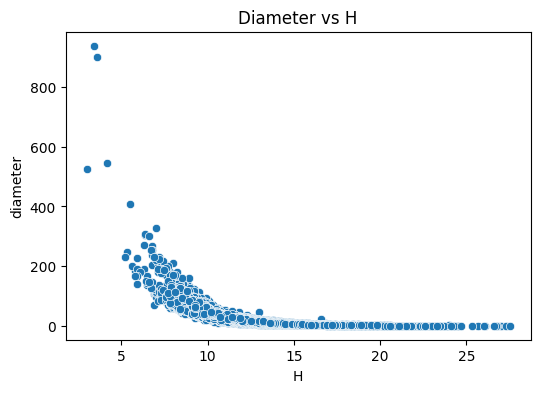

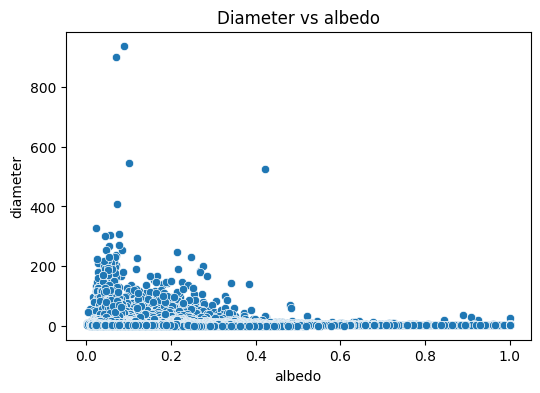

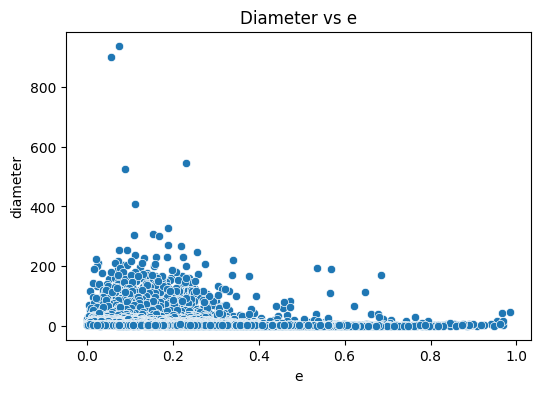

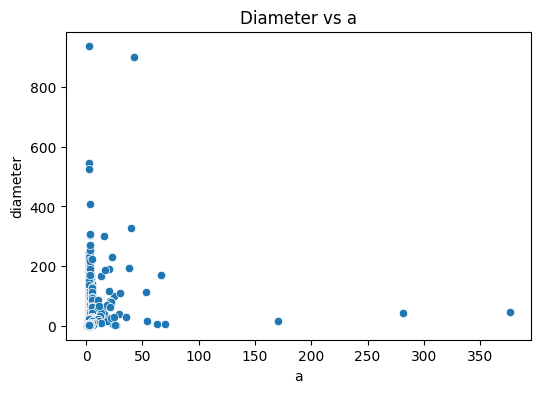

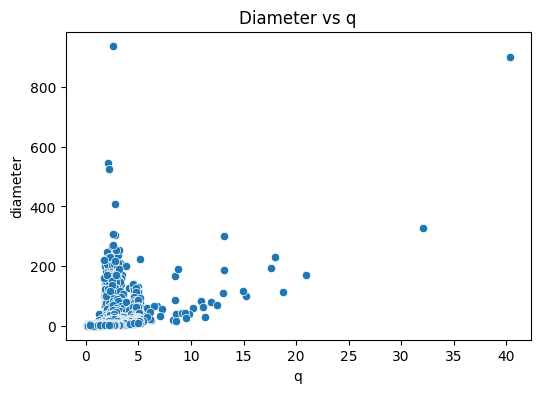

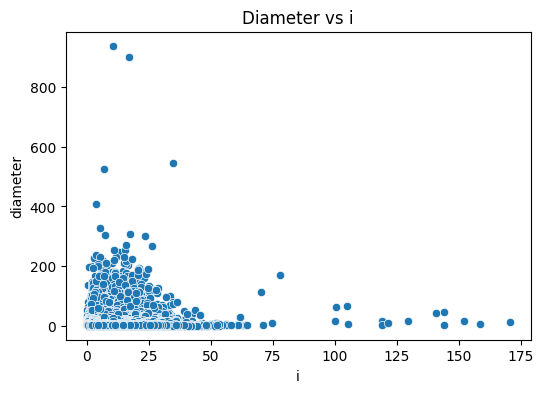

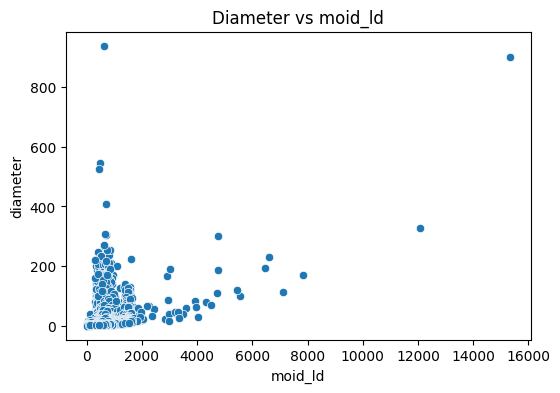

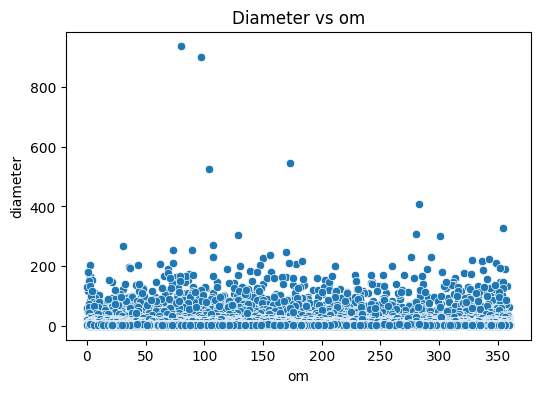

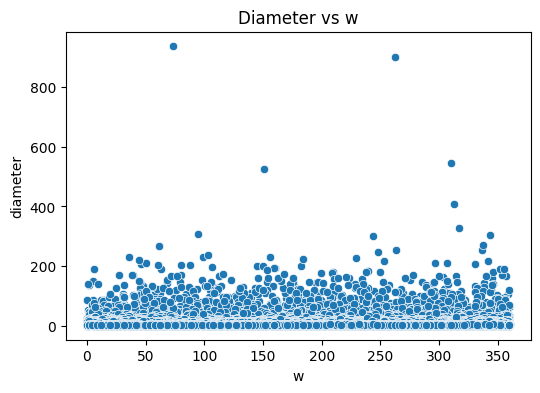

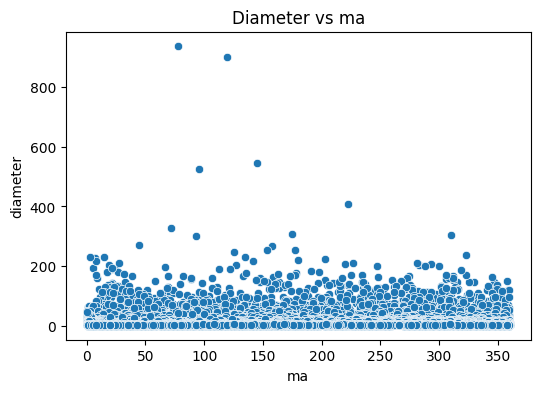

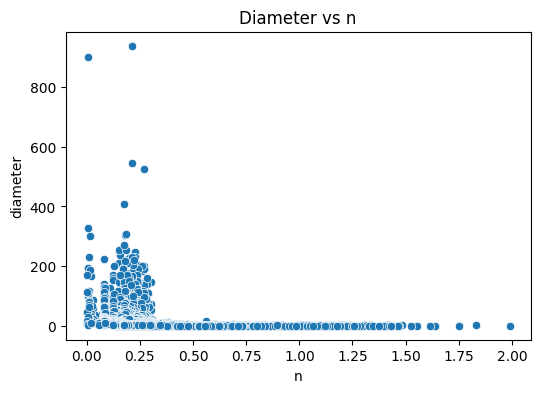

In [31]:
num_cols = ['H', 'albedo', 'e', 'a', 'q', 'i', 'moid_ld', 'om', 'w', 'ma', 'n']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y='diameter')
    plt.title(f'Diameter vs {col}')
    plt.show()

# check outliers

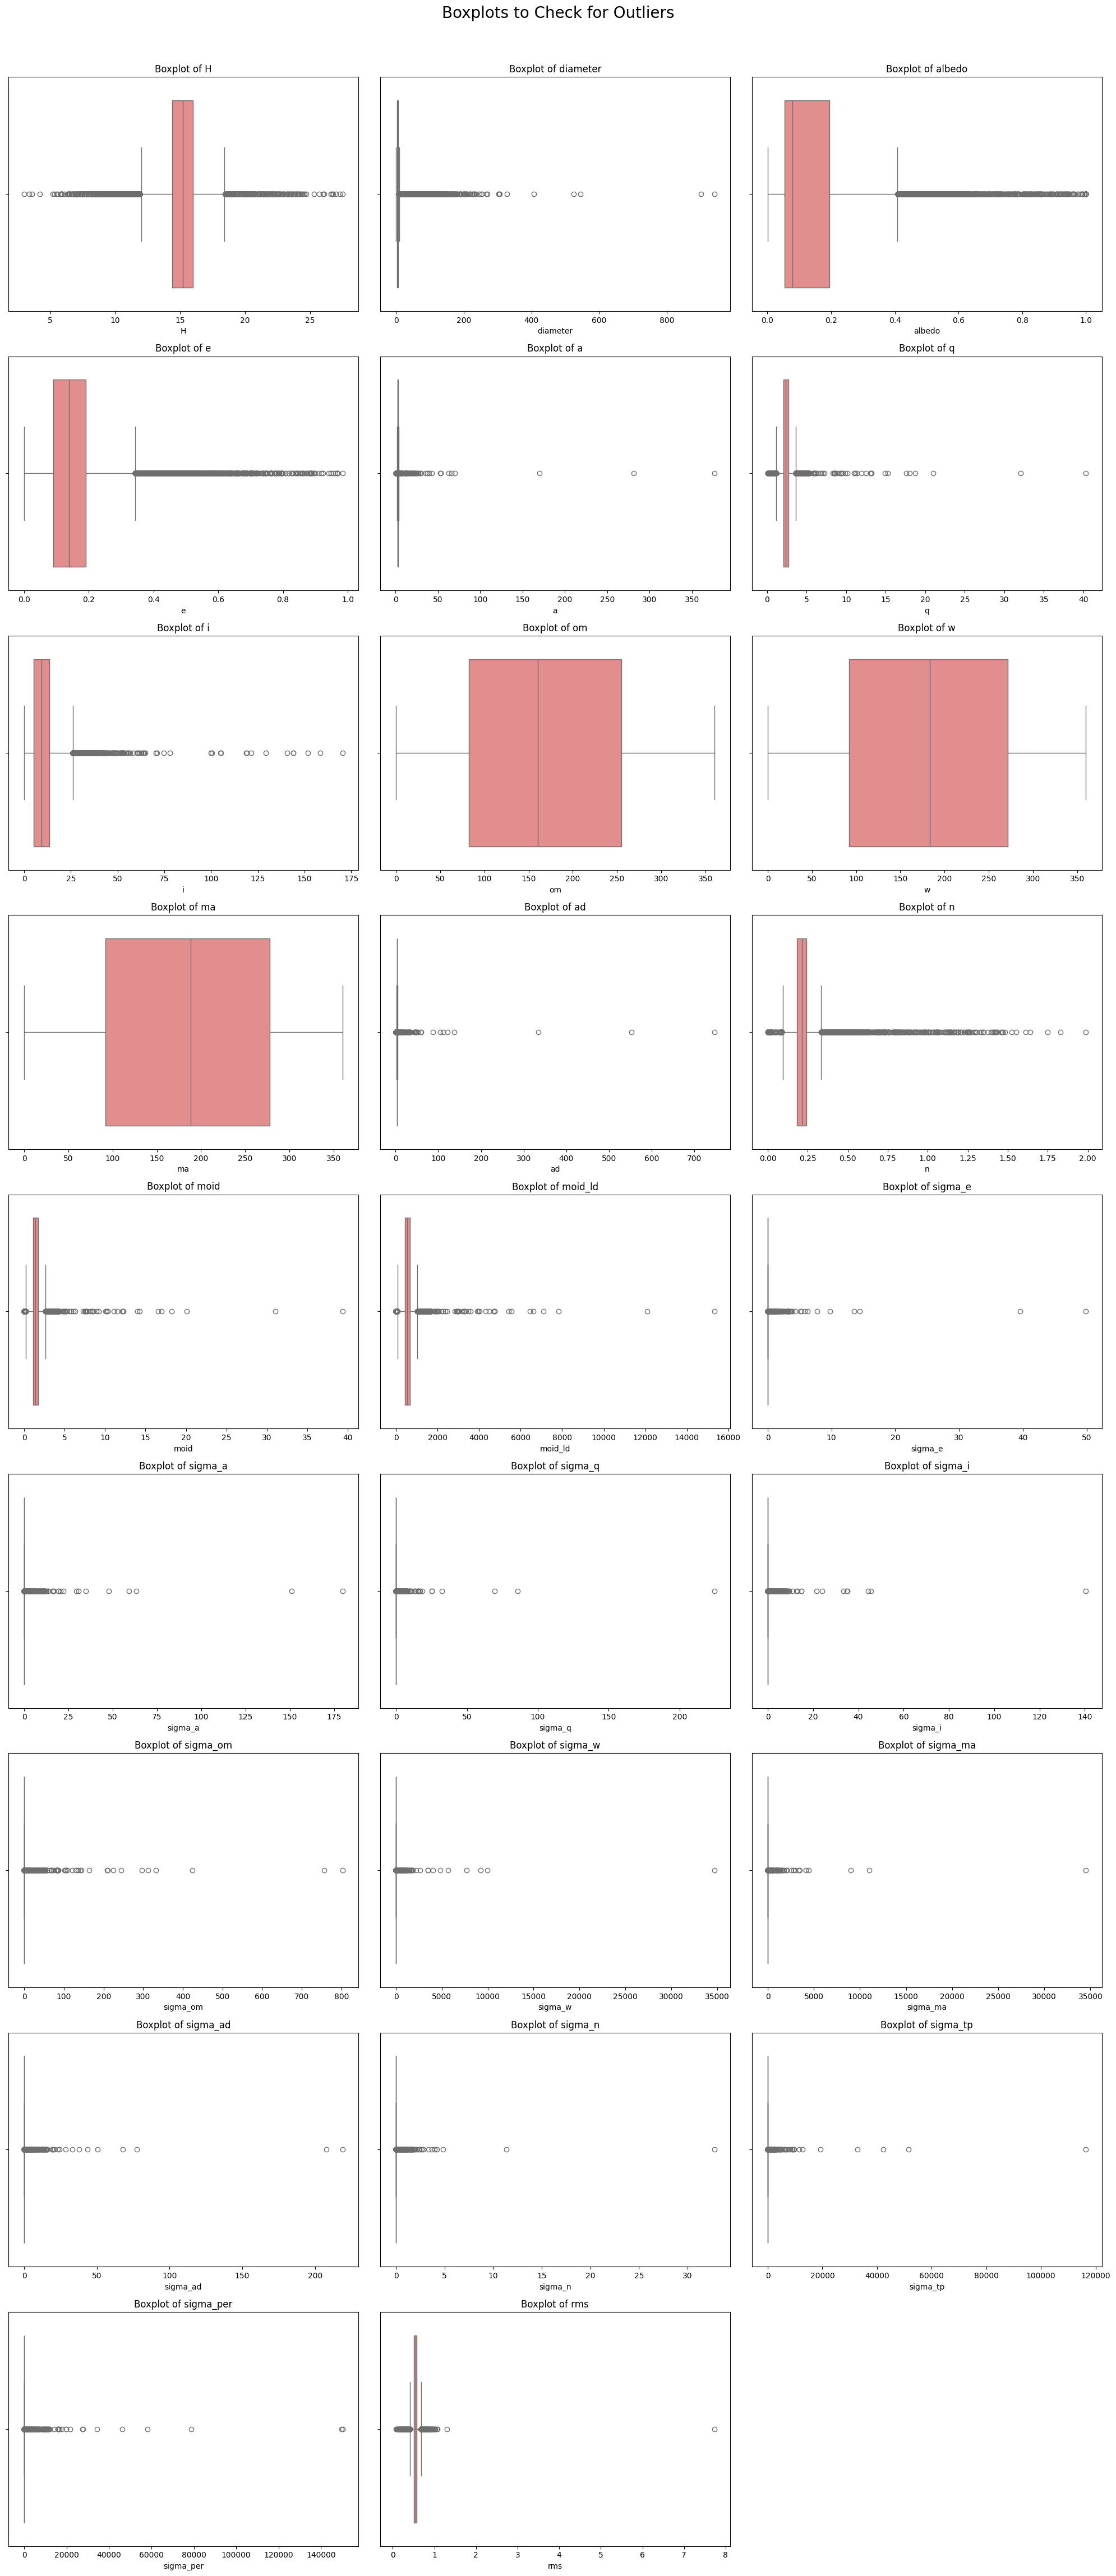

In [32]:
import math
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)


plt.figure(figsize=(20, n_rows * 5))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots to Check for Outliers', y=1.02, fontsize=20)
plt.show()

In [33]:
#IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))


outliers.sum()


H             3504
diameter      9363
albedo        2972
e             1413
a             3409
q             2665
i             4189
om               0
w                0
ma               0
ad            3551
n             2945
moid          2518
moid_ld       2518
sigma_e      10861
sigma_a      10846
sigma_q      11033
sigma_i       9598
sigma_om     11605
sigma_w      11366
sigma_ma     12656
sigma_ad     11030
sigma_n      10577
sigma_tp     13120
sigma_per    10747
rms           3297
dtype: int64

In [34]:
original_df = df.copy()

In [35]:
columns_with_outliers = [
    'H', 'diameter', 'albedo',
    'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per',
    'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
    'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'
]

for col in columns_with_outliers:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [36]:
print("before", len(original_df))
print("After", len(df))

before 131237
After 69328


In [37]:
# IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))


outliers.sum()


H             313
diameter      638
albedo          0
e             226
a               0
q               0
i             936
om              0
w               0
ma              0
ad             19
n               0
moid            0
moid_ld         0
sigma_e      1789
sigma_a       181
sigma_q      1005
sigma_i      1131
sigma_om     2643
sigma_w      2896
sigma_ma     1570
sigma_ad      392
sigma_n       702
sigma_tp     1312
sigma_per     238
rms           109
dtype: int64

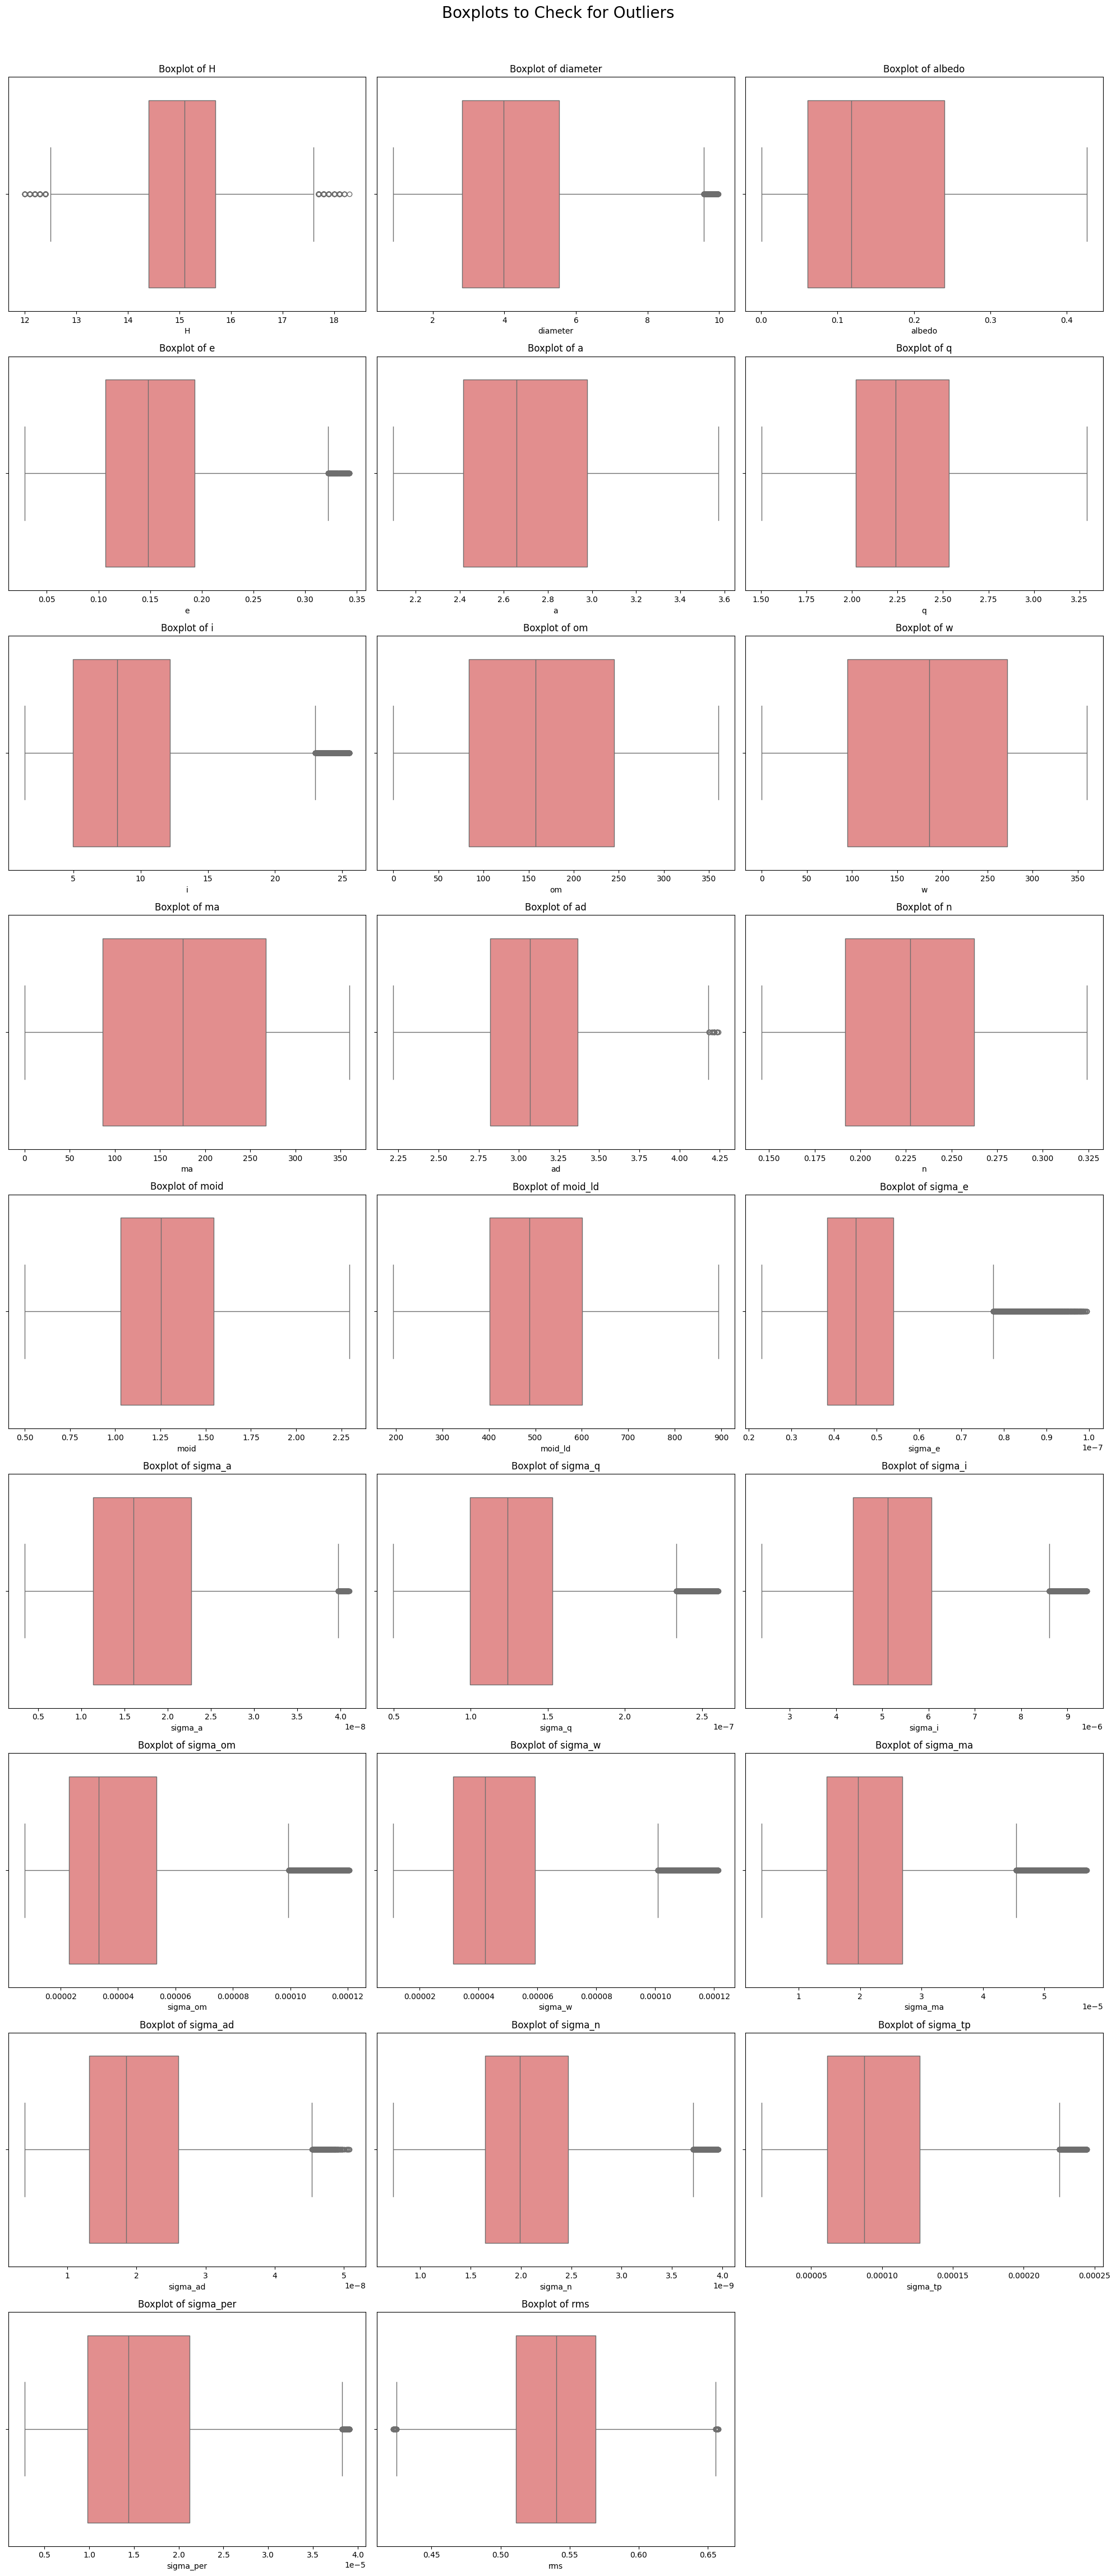

In [38]:
import math
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)


plt.figure(figsize=(20, n_rows * 5))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots to Check for Outliers', y=1.02, fontsize=20)
plt.show()

# preprocessing

In [39]:
df= pd.get_dummies(df, columns=['class'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69328 entries, 227 to 890681
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neo        69328 non-null  object 
 1   pha        69328 non-null  object 
 2   H          69328 non-null  float64
 3   diameter   69328 non-null  float64
 4   albedo     69328 non-null  float64
 5   equinox    69328 non-null  object 
 6   e          69328 non-null  float64
 7   a          69328 non-null  float64
 8   q          69328 non-null  float64
 9   i          69328 non-null  float64
 10  om         69328 non-null  float64
 11  w          69328 non-null  float64
 12  ma         69328 non-null  float64
 13  ad         69328 non-null  float64
 14  n          69328 non-null  float64
 15  moid       69328 non-null  float64
 16  moid_ld    69328 non-null  float64
 17  sigma_e    69328 non-null  float64
 18  sigma_a    69328 non-null  float64
 19  sigma_q    69328 non-null  float64
 20  sigma_i 

In [41]:
df.shape

(69328, 32)

In [42]:

bool_cols = df.select_dtypes(include=['bool']).columns

df[bool_cols] = df[bool_cols].astype(int)


In [43]:
import pandas as pd


mapping = {'Y': 1, 'N': 0}

for col in ['neo', 'pha']:
    df[col] = df[col].map(mapping)

In [44]:
x= df.select_dtypes(include=['int64', 'float64'])

In [45]:
x = x.drop('diameter', axis=1)
y = df['diameter']

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69328 entries, 227 to 890681
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neo        69328 non-null  int64  
 1   pha        69328 non-null  int64  
 2   H          69328 non-null  float64
 3   albedo     69328 non-null  float64
 4   e          69328 non-null  float64
 5   a          69328 non-null  float64
 6   q          69328 non-null  float64
 7   i          69328 non-null  float64
 8   om         69328 non-null  float64
 9   w          69328 non-null  float64
 10  ma         69328 non-null  float64
 11  ad         69328 non-null  float64
 12  n          69328 non-null  float64
 13  moid       69328 non-null  float64
 14  moid_ld    69328 non-null  float64
 15  sigma_e    69328 non-null  float64
 16  sigma_a    69328 non-null  float64
 17  sigma_q    69328 non-null  float64
 18  sigma_i    69328 non-null  float64
 19  sigma_om   69328 non-null  float64
 20  sigma_w 

# scalling

In [47]:
X_scaled = StandardScaler().fit_transform(x)

# splitting

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1, shuffle=True)

# train model

In [49]:

model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=1
)


model.fit(X_train, y_train)

print("✅ Training Done!")


✅ Training Done!


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score (Accuracy for regression): {r2:.4f}")


Mean Absolute Error (MAE): 0.2779
Mean Squared Error (MSE): 0.1644
Root Mean Squared Error (RMSE): 0.4055
R² Score (Accuracy for regression): 0.9563


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

In [52]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))


In [53]:
print(" Linear Regression:")
print(f"  R² Score : {r2_lin:.4f}")
print(f"  RMSE     : {rmse_lin:.4f}")

print("\nPolynomial Regression (degree=2):")
print(f"  R² Score : {r2_poly:.4f}")
print(f"  RMSE     : {rmse_poly:.4f}")

 Linear Regression:
  R² Score : 0.8673
  RMSE     : 0.7064

Polynomial Regression (degree=2):
  R² Score : 0.9422
  RMSE     : 0.4664


In [55]:
from sklearn.linear_model import Lasso, Ridge

In [56]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}")
    print(f"  R² Score : {r2:.4f}")
    print(f"  RMSE     : {rmse:.4f}\n")

y_test_pred_lin = lin_model.predict(X_test)
y_test_pred_lasso = lasso_model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)


evaluate_model(y_test, y_test_pred_lin, "Linear Regression")
evaluate_model(y_test, y_test_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_test_pred_ridge, "Ridge Regression")


Linear Regression
  R² Score : 0.8673
  RMSE     : 0.7064

Lasso Regression
  R² Score : 0.8473
  RMSE     : 0.7580

Ridge Regression
  R² Score : 0.8672
  RMSE     : 0.7068

